In [1]:
import datetime
import sys
import pandas as pd
import numpy as np
import math

sys.path.append('../common/')
sys.path.append('../data/')
import warnings

pd.set_option("mode.chained_assignment", None)
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated")
print(sys.version)

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]


In [137]:
# !pip install snowflake-connector-python
# !pip install python-dotenv
# !pip install lightgbm
# !pip install imblearn

In [2]:
# read from csv
df_sequence_20230101 = pd.read_csv('../data/sequence_20230101.csv', sep='|')

/var/folders/87/68jxvfgs4f91bq6p06d8lzpc0000gp/T/ipykernel_27016/2171992985.py:2: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sequence_20230101 = pd.read_csv('../data/sequence_20230101.csv', sep='|')


In [38]:
df_sequence_20230101

OCCURRED_DATE  SEQUENCE_ID                       SEQUENCE_NAME  \
0           20230410     76684087                     Portal Sequence   
1           20230922     90434194  Micro Segment 1 - Deep SMB - < 250   
2           20230424     76684087                     Portal Sequence   
3           20230414     76684087                     Portal Sequence   
4           20230512     76684087                     Portal Sequence   
...              ...          ...                                 ...   
80815       20230213     76684087                     Portal Sequence   
80816       20230227     76684087                     Portal Sequence   
80817       20230308     76684087                     Portal Sequence   
80818       20230217     76684087                     Portal Sequence   
80819       20230318     76684087                     Portal Sequence   

       STEP_ID  TEMPLATE_ID  SEQUENCE_ENROLLMENT_ID  \
0            0     37999983              6732583864   
1            2     48653112              8045771370   
2            2     38000003              6732583936   
3            1     37999996              6732583865   
4            4     38000054              6732583938   
...        ...          ...                     ...   
80815        0     37999983              6308364197   
80816        2     38000003              6308364199   
80817        3     38001777              6308364200   
80818        1     37999996              6308364198   
80819        4     38000054              6308364201   

            SEQUENCE_STEP_EXCUTION_ID  CONTACT_ID CONTACT_FIRST_NAME  \
0      76684087-1568041278-6732583864       35548              Chris   
1      90434194-1858371402-8045771370       35548              Chris   
2      76684087-1568041278-6732583936       35548              Chris   
3      76684087-1568041278-6732583865       35548              Chris   
4      76684087-1568041278-6732583938       35548              Chris   
...                               ...         ...                ...   
80815  76684087-1475591317-6308364197    58829251           Veronica   
80816  76684087-1475591317-6308364199    58829251           Veronica   
80817  76684087-1475591317-6308364200    58829251           Veronica   
80818  76684087-1475591317-6308364198    58829251           Veronica   
80819  76684087-1475591317-6308364201    58829251           Veronica   

      CONTACT_LAST_NAME  CONTACT_COMPANY_ID  \
0             Honeycutt          4280730952   
1             Honeycutt          4280730952   
2             Honeycutt          4280730952   
3             Honeycutt          4280730952   
4             Honeycutt          4280730952   
...                 ...                 ...   
80815         Rodriguez         13150921871   
80816         Rodriguez         13150921871   
80817         Rodriguez         13150921871   
80818         Rodriguez         13150921871   
80819         Rodriguez         13150921871   

                    CONTACT_COMPANY_NAME  SENT_COUNT  REPLY_COUNT  OPEN_COUNT  \
0      Constellation Property Management         1.0          NaN         NaN   
1      Constellation Property Management         1.0          NaN         NaN   
2      Constellation Property Management         1.0          NaN         NaN   
3      Constellation Property Management         1.0          NaN         NaN   
4      Constellation Property Management         1.0          NaN         NaN   
...                                  ...         ...          ...         ...   
80815                   Monte Carlo Apts         1.0          NaN         NaN   
80816                   Monte Carlo Apts         1.0          NaN         NaN   
80817                   Monte Carlo Apts         1.0          NaN         NaN   
80818                   Monte Carlo Apts         1.0          NaN         NaN   
80819                   Monte Carlo Apts         1.0          NaN         NaN   

       MEETING_BOOKED_COUNT      CONTACT_UPDATE_DATE CONTACT_CITY 

In [11]:
df_sequence_20230101['SEQUENCE_ID'].nunique()

230

In [45]:
top_sequence = (df_sequence_20230101.groupby(['SEQUENCE_ID', 'CONTACT_ID', 'CONTACT_COMPANY_ID']).agg({'SEQUENCE_NAME': 'max'})
 .reset_index())[['SEQUENCE_ID', 'SEQUENCE_NAME']].value_counts()[lambda x: x > 50]
top_sequence.to_csv('../data/top_sequence_more_than_50_execution.csv')

In [40]:
(df_sequence_20230101.groupby(['SEQUENCE_ID', 'CONTACT_ID', 'CONTACT_COMPANY_ID'])
 .size()
 .reset_index())['SEQUENCE_ID'].value_counts()[lambda x: x > 100]

SEQUENCE_ID
76684087    2344
76373402    2057
87424905     988
79012529     952
76848042     714
88793959     652
91000972     641
86085226     596
76230405     582
79073555     548
89514162     543
37380911     533
82158092     517
75592288     445
64225429     409
77404520     408
87423315     405
85928494     253
79576946     246
76517381     241
88621355     240
86984238     239
85816163     238
91512838     222
77065378     214
75589554     203
91414143     184
87759154     184
81263498     182
82137201     182
75585648     178
77682521     178
88021295     177
83983922     177
88185617     171
81685151     165
77550881     157
83508047     156
91009600     147
77232197     137
87748694     136
84719525     131
90611753     129
90600367     129
77531243     128
80255635     126
73453658     125
86924605     124
85941593     124
75636876     124
76256079     121
89930083     118
77898811     116
86903365     106
91074975     104
87756133     102
80773993     101
87756146     101
Na

In [139]:
print('\n'.join(df_sequence_20230101.columns))

OCCURRED_DATE
SEQUENCE_ID
SEQUENCE_NAME
STEP_ID
TEMPLATE_ID
SEQUENCE_ENROLLMENT_ID
SEQUENCE_STEP_EXCUTION_ID
CONTACT_ID
CONTACT_FIRST_NAME
CONTACT_LAST_NAME
CONTACT_COMPANY_ID
CONTACT_COMPANY_NAME
SENT_COUNT
REPLY_COUNT
OPEN_COUNT
MEETING_BOOKED_COUNT
CONTACT_UPDATE_DATE
CONTACT_CITY
CONTACT_COMPANY
CONTACT_COUNTRY
CONTACT_CREATE_DATE
CONTACT_CREATE_TIMESTAMP
CONTACT_EAMIL
CONTACT_FIRST_DEAL_CREATE_DATE
CONTACT_ADDITIONAL_EMAIL
CONTACT_EMAIL_DOMAIN
CONTACT_IP_TIMEZONE
CONTACT_IS_UNWORKED
CONTACT_LATEST_SEQUENCE_ENDED_DATE
CONTACT_LATEST_SEQUENCE_ENDED_TIMESTAMP
CONTACT_LATEST_SEQUENCE_ENROLLED_DATE
CONTACT_LATEST_SEQUENCE_ENTROLLED_TIMESTAMP
CONTACT_LEAD_STATUS
CONTACT_SEQUENCES_ENROLLED_COUNT
CONTACT_SEQUENCES_IS_ENROLLED
CONTACT_TIME_BETWEEN_CONTACT_CREATION_AND_DEAL_CREATION
CONTACT_HUBSPOT_OWNER_ID
CONTACT_HUBSPOT_TEAM_ID
CONTACT_JOB_TITLE
CONTACT_LAST_MODIFIED_DATE
CONTACT_LAST_MODIFED_TIMESTAMP
CONTACT_LEAD_SOURCE
CONTACT_LINKEDIN
CONTACT_MOBILE_PHONE
CONTACT_NUM_ASSOCIATED_DEALS

### useful columns
- target: 'SENT_COUNT', 'REPLY_COUNT', 'OPEN_COUNT', 'MEETING_BOOKED_COUNT'
- variables: 
    -   'SEQUENCE_ID', 'TEMPLATE_ID', 
    -   'CONTACT_JOB_TITLE', 'CONTACT_CITY', 'CONTACT_STATE', 
    -   'COMPANY_ANNUAL_REVENUE', 'COMPANY_FOUNDED_YEAR','COMPANY_UNITS', 'COMPANY_PROTFOLIO_TYPE', 'COMPANY_PROTFOLIO_SUBTYPE', 'COMPANY_SEGMENT', 'COMPANY_STATE', ]

In [140]:
#fill None value of performance with 0
subset = ['SENT_COUNT', 'REPLY_COUNT', 'OPEN_COUNT', 'MEETING_BOOKED_COUNT']
df_sequence_20230101.loc[:, subset] = df_sequence_20230101.loc[:, subset].fillna(0).astype(int)

# Feature Engineering

In [141]:
# Job Title 
import re


def job_title_to_level(job_title: str) -> str:
    OWNER_LEVEL_KEY_WORDS = ['owner', 'co-Founder', 'founder']
    OWNER_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in OWNER_LEVEL_KEY_WORDS) + r')\b'

    CHIEF_LEVEL_KEY_WORDS = ['chief', 'ceo', 'cfo', 'coo', 'cto', 'co-president', 'president', 'chairman']
    CHIEF_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in CHIEF_LEVEL_KEY_WORDS) + r')\b'

    CHIEF_LEVEL_EXCLUDE_KEY_WORDS = ['vice president', 'Assistant']
    CHIEF_LEVEL_EXCLUDE_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in CHIEF_LEVEL_EXCLUDE_KEY_WORDS) + r')\b'

    PARTNER_LEVEL_KEY_WORDS = ['partner']
    PARTNER_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in PARTNER_LEVEL_KEY_WORDS) + r')\b'

    VP_LEVEL_KEY_WORDS = ['vp', 'svp', 'vice president', 'head']
    VP_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in VP_LEVEL_KEY_WORDS) + r')\b'

    DIRECTOR_LEVEL_KEY_WORDS = ['director', 'dir']
    DIRECTOR_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in DIRECTOR_LEVEL_KEY_WORDS) + r')\b'

    MANAGER_LEVEL_KEY_WORDS = ['manager', 'property manager', 'pm', 'regional manager', 'supervisor', 'lead', 'leader',
                               'management', 'principal', 'administrator']
    MANAGER_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in MANAGER_LEVEL_KEY_WORDS) + r')\b'

    AGENT_LEVEL_KEY_WORDS = ['agent', 'regional']
    AGENT_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in AGENT_LEVEL_KEY_WORDS) + r')\b'

    CONTROLLER_LEVEL_KEY_WORDS = ['controller']
    CONTROLLER_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in CONTROLLER_LEVEL_KEY_WORDS) + r')\b'

    ACCOUNTANT_LEVEL_KEY_WORDS = ['accountant', 'accounting']
    ACCOUNTANT_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in ACCOUNTANT_LEVEL_KEY_WORDS) + r')\b'

    ASSISTANT_LEVEL_KEY_WORDS = ['assistant', 'receptionist']
    ASSISTANT_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in ASSISTANT_LEVEL_KEY_WORDS) + r')\b'

    BROKER_LEVEL_KEY_WORDS = ['broker']
    BROKER_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in BROKER_LEVEL_KEY_WORDS) + r')\b'

    ANALYST_LEVEL_KEY_WORDS = ['analyst', 'specialist', 'consultant', 'associate', 'representative', 'AR']
    ANALYST_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in ANALYST_LEVEL_KEY_WORDS) + r')\b'

    COORDINATOR_LEVEL_KEY_WORDS = ['coordinator']
    COORDINATOR_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in COORDINATOR_LEVEL_KEY_WORDS) + r')\b'

    FINANCE_LEVEL_KEY_WORDS = ['bookkeeper']
    FINANCE_LEVEL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in FINANCE_LEVEL_KEY_WORDS) + r')\b'

    if re.search(OWNER_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Owner'
    if re.search(CHIEF_LEVEL_PATTERN, job_title, re.IGNORECASE) and not re.search(CHIEF_LEVEL_EXCLUDE_PATTERN,
                                                                                  job_title, re.IGNORECASE):
        return 'C_level'
    if re.search(PARTNER_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Partner'
    if re.search(VP_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'VP'
    if re.search(DIRECTOR_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Director'
    if re.search(MANAGER_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Manager'
    if re.search(AGENT_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Agent'
    if re.search(CONTROLLER_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Controller'
    if re.search(ACCOUNTANT_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Accountant'
    if re.search(ASSISTANT_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Assistant'
    if re.search(BROKER_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Broker'
    if re.search(ANALYST_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Analyst'
    if re.search(COORDINATOR_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Coordinator'
    if re.search(FINANCE_LEVEL_PATTERN, job_title, re.IGNORECASE):
        return 'Finance'
    return 'Other'


df_sequence_20230101['CONTACT_JOB_TITLE_LEVEL'] = df_sequence_20230101['CONTACT_JOB_TITLE'] \
    .apply(lambda x: job_title_to_level(x) if not pd.isna(x) else 'missing')
df_sequence_20230101[['CONTACT_JOB_TITLE_LEVEL', 'CONTACT_JOB_TITLE']]
# df_sequence_20230101[ False\
#                              # (seq_contact_company_df_title['contact_job_title_level'] == 'Manager')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Director')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'VP')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'C_level')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Owner')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Agent')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Partner')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Controller')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Accountant')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Assistant')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Broker')\ 
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Analyst')\
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Coordinator')\ 
#                              # | (seq_contact_company_df_title['contact_job_title_level'] == 'Finance')
#                              | (df_sequence_20230101['CONTACT_JOB_TITLE'] == 'Other')
#                             ][['CONTACT_JOB_TITLE_LEVEL', 'CONTACT_JOB_TITLE']]
# df_sequence_20230101['CONTACT_JOB_TITLE_LEVEL'].value_counts()

CONTACT_JOB_TITLE_LEVEL CONTACT_JOB_TITLE
0                     C_level  President/Broker
1                     C_level  President/Broker
2                     C_level  President/Broker
3                     C_level  President/Broker
4                     C_level  President/Broker
...                       ...               ...
80815                 Manager                PM
80816                 Manager                PM
80817                 Manager                PM
80818                 Manager                PM
80819                 Manager                PM

[80820 rows x 2 columns]

In [142]:
# Job Department 
# seq_contact_company_df_title = seq_contact_company_df.copy()
import re


def job_title_to_department(job_title: str) -> str:
    OVERALL_MANAGEMENT_KEY_WORDS = ['owner', 'co-Founder', 'founder', 'ceo', 'coo', 'chief', 'co-president',
                                    'president', 'chairman', 'partner']
    OVERALL_MANAGEMENT_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in OVERALL_MANAGEMENT_KEY_WORDS) + r')\b'

    OVERALL_MANAGEMENT_EXCLUDE_KEY_WORDS = ['vice president', 'Assistant']
    OVERALL_MANAGEMENT_EXCLUDE_PATTERN = r'\b(' + '|'.join(
        re.escape(kw) for kw in OVERALL_MANAGEMENT_EXCLUDE_KEY_WORDS) + r')\b'

    MARKERTING_KEY_WORDS = ['market', 'marketing']
    MARKERTING_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in MARKERTING_KEY_WORDS) + r')\b'

    OPERATION_KEY_WORDS = ['operations', 'operation', 'ops']
    OPERATION_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in OPERATION_KEY_WORDS) + r')\b'

    FINANCE_KEY_WORDS = ['finance', 'bookkeeper', 'financial', 'cfo', 'accountant', 'accounting']
    FINANCE_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in FINANCE_KEY_WORDS) + r')\b'

    ADMINISTRATION_KEY_WORDS = ['administrator', 'admin', 'coordinator', 'assistant', 'receptionist']
    ADMINISTRATION_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in ADMINISTRATION_KEY_WORDS) + r')\b'

    BUSINESS_KEY_WORDS = ['regional', 'Strategy', 'vp', 'director', 'dir', 'manager', 'vice president', 'controller',
                          'broker', 'agent', 'supervisor', 'PM', 'leasing', 'Management', 'leader' \
        , 'principal', 'representative', 'head', 'lead', 'svp', 'ar']
    BUSINESS_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in BUSINESS_KEY_WORDS) + r')\b'

    TECHNICAL_KEY_WORDS = ['analyst', 'it', 'cto', 'specialist', 'associate', 'consultant']
    TECHNICAL_PATTERN = r'\b(' + '|'.join(re.escape(kw) for kw in TECHNICAL_KEY_WORDS) + r')\b'

    # NOTE! the order matters !!
    if re.search(OVERALL_MANAGEMENT_PATTERN, job_title, re.IGNORECASE) and not re.search(
            OVERALL_MANAGEMENT_EXCLUDE_PATTERN, job_title, re.IGNORECASE):
        return 'Overall_Management'
    if re.search(MARKERTING_PATTERN, job_title, re.IGNORECASE):
        return 'Marketing'
    if re.search(OPERATION_PATTERN, job_title, re.IGNORECASE):
        return 'Operations'
    if re.search(FINANCE_PATTERN, job_title, re.IGNORECASE):
        return 'Finance'
    if re.search(BUSINESS_PATTERN, job_title, re.IGNORECASE):
        return 'Business'
    if re.search(ADMINISTRATION_PATTERN, job_title, re.IGNORECASE):
        return 'Administrator'
    if re.search(TECHNICAL_PATTERN, job_title, re.IGNORECASE):
        return 'Technical'
    return 'Other'


df_sequence_20230101['CONTACT_JOB_TITLE_DEPARTMENT'] = df_sequence_20230101['CONTACT_JOB_TITLE'] \
    .apply(lambda x: job_title_to_department(x) if not pd.isna(x) else 'missing')
df_sequence_20230101[['CONTACT_JOB_TITLE_DEPARTMENT', 'CONTACT_JOB_TITLE']]
# df_sequence_20230101[ False\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Marketing')
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Overall_Management')
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Operations')
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Business')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Technical')
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Finance')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Administrator')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Agent')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Partner')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Controller')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Accountant')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Assistant')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Broker')\ 
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Analyst')\
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Coordinator')\ 
#                              # | (seq_contact_company_df_title['contact_job_title_department'] == 'Bookkeeper')
#                              | (df_sequence_20230101['CONTACT_JOB_TITLE_DEPARTMENT'] == 'Other')
#                             ][['CONTACT_JOB_TITLE_DEPARTMENT', 'CONTACT_JOB_TITLE_LEVEL','CONTACT_JOB_TITLE']]
# seq_contact_company_df_title['contact_job_title_department'].value_counts()

CONTACT_JOB_TITLE_DEPARTMENT CONTACT_JOB_TITLE
0               Overall_Management  President/Broker
1               Overall_Management  President/Broker
2               Overall_Management  President/Broker
3               Overall_Management  President/Broker
4               Overall_Management  President/Broker
...                            ...               ...
80815                     Business                PM
80816                     Business                PM
80817                     Business                PM
80818                     Business                PM
80819                     Business                PM

[80820 rows x 2 columns]

In [143]:
# Add sequence category 
# 1. filter out the sequence barely used in 2023
MIN_ENROLLED_COUNT = 40
df_sequence_filter = df_sequence_20230101.groupby(by=['SEQUENCE_ID']).filter(
    lambda group: group['CONTACT_ID'].nunique() >= MIN_ENROLLED_COUNT)
print(df_sequence_filter.shape)
# 2. exclude some invalid sequences

status_special_words = ['Engagement', 'resident', 'Re-Intro', 'JES - OON renters want Flex (small)']
status_special_df = df_sequence_filter[df_sequence_filter['SEQUENCE_NAME'].apply(
    lambda x: True if any(ssw.lower() in x.lower() for ssw in status_special_words) else False)][
    ['SEQUENCE_ID', 'SEQUENCE_NAME']]
status_special_df

event_special_words = ['Holiday Delinquency', 'holiday', 'NARPM', 'BP', 'Rent Reporting', 'TAA', 'NAA', 'AIM',
                       'Micro Segment', 'NMHC']
event_special_df = df_sequence_filter[df_sequence_filter['SEQUENCE_NAME'].apply(
    lambda x: True if any(esw.lower() in x.lower() for esw in event_special_words) else False)][
    ['SEQUENCE_ID', 'SEQUENCE_NAME']]
event_special_df

extra_exclude = [

    {'SEQUENCE_ID': 75585648, 'SEQUENCE_NAME': "White Space Mar - Cory/Louis"},
    #already have user in pmc, reachout other properties 
    {'SEQUENCE_ID': 90434194, 'SEQUENCE_NAME': "Micro Segment 1 - Deep SMB - < 250"},  #with NARPM related template  
    {'SEQUENCE_ID': 77550862, 'SEQUENCE_NAME': "Katie/Mina Feb 2023"},  #for previous touched pmc  
    {'SEQUENCE_ID': 91000942, 'SEQUENCE_NAME': "Phase 2 Micro Segment 2 - Deep SMB - 250-500"},
    # with NARPM related template 
    {'SEQUENCE_ID': 90430277, 'SEQUENCE_NAME': "Micro Segment 3 - Deep SMB - 501-999"},  # with NARPM related template  
    {'SEQUENCE_ID': 91009671, 'SEQUENCE_NAME': "Phase 2 Micro Segment 3 - Deep SMB - 501-999"},
    # with NARPM related template 
]
extra_df = pd.DataFrame(extra_exclude)
extra_df

exclude_df = pd.concat([status_special_df, event_special_df, extra_df]).reset_index()
display(exclude_df)

# 3.filter out the excluded sequence 

df_sequence_filter = df_sequence_filter[~df_sequence_filter['SEQUENCE_ID'].isin(exclude_df['SEQUENCE_ID'])]

df_sequence_filter


# 4. combine similar sequence 

def seq_name_cat(seq_name):
    if '2nd Multi Touch'.lower() in seq_name.lower():
        return '2nd Multi Touch'
    if any(word.lower() in seq_name.lower() for word in ['Fiona/Jordan Feb seq', 'Portal', 'JE Jan 23 with calls',
                                                         'Jordan Feb Sequence', 'Garrett/Fiona (ALN)',
                                                         'Fiona/Ariel April (clone)',
                                                         'JE Jan 23 with calls Clone - no info', 'Ally/Mina April Seq',
                                                         'JE Jan 23',
                                                         'Activate Flex', 'Brandon/Louis July - portal activation Clone'
                                                         ]):
        return 'Portal Sequence'
    if any(word.lower() in seq_name.lower() for word in ['Benefits']):
        return 'Benefits'
    if any(word.lower() in seq_name.lower() for word in ['Jan 2023', 'January 2023']):
        return 'New Year Start'
    if any(word.lower() in seq_name.lower() for word in ['Regional']):
        return 'Regionals'
    if any(word.lower() in seq_name.lower() for word in ['chatgpt']):
        return 'ChatGPT'
    if any(word.lower() in seq_name.lower() for word in ['budget']):
        return 'Budgets'
    return seq_name


df_sequence_filter['sequence_name_cat'] = df_sequence_filter['SEQUENCE_NAME'].apply(lambda x: seq_name_cat(x))
df_sequence_filter[:100]
df_sequence_filter['sequence_name_cat'].value_counts()

(76508, 83)


index  SEQUENCE_ID                                      SEQUENCE_NAME
0        52     91280508  Cold outreach 1: For a property with 1 residen...
1        56     91280508  Cold outreach 1: For a property with 1 residen...
2       101     76737910  Feb. '23 Engagement Outreach - Property Level ...
3       102     76737910  Feb. '23 Engagement Outreach - Property Level ...
4       103     76737910  Feb. '23 Engagement Outreach - Property Level ...
...     ...          ...                                                ...
9829      1     90434194                 Micro Segment 1 - Deep SMB - < 250
9830      2     77550862                                Katie/Mina Feb 2023
9831      3     91000942       Phase 2 Micro Segment 2 - Deep SMB - 250-500
9832      4     90430277               Micro Segment 3 - Deep SMB - 501-999
9833      5     91009671       Phase 2 Micro Segment 3 - Deep SMB - 501-999

[9834 rows x 3 columns]

Portal Sequence                               37892
ZB June 2023 *                                 3562
Regionals                                      3011
New Year Start                                 2700
Benefits                                       2064
Spencer Multi Touch Master Sequence            1893
ChatGPT                                        1849
2nd Multi Touch                                1132
Cory/Louis Feb 2023                            1090
Morgan Q2 Email Sequence - Emails               928
JE Q2 Email Sequence - Emails                   884
KL SL Clone (feb)                               814
New Sequence 6.23                               770
Fiona/Spencer April                             686
JM July 23                                      594
ZI Intent (Sidonie)                             494
Mina/Katie Feb 2023 Outreach                    411
Fiona/Zach April                                403
Ally/Mina June/July                             382
Rory June/Ju

# Correlation Check for Sequence category Level

In [144]:
seq_contact_company_df = (df_sequence_filter.groupby(by=['SEQUENCE_ID', 'CONTACT_ID', 'CONTACT_COMPANY_NAME'])
                          .agg(send_count=('SENT_COUNT', 'sum'),
                               reply_count=('REPLY_COUNT', 'sum'),
                               meeting_booked_count=('MEETING_BOOKED_COUNT', 'sum'),
                               open_count=('OPEN_COUNT', 'sum'),
                               sequence_name_cat=('sequence_name_cat', 'first'),
                               contact_job_title=('CONTACT_JOB_TITLE', 'first'),
                               contact_job_title_level=('CONTACT_JOB_TITLE_LEVEL', 'first'),
                               contact_job_title_department=('CONTACT_JOB_TITLE_DEPARTMENT', 'first'),
                               company_protfolio_type=('COMPANY_PROTFOLIO_TYPE', 'first'),
                               company_protfolio_subtype=('COMPANY_PROTFOLIO_SUBTYPE', 'first'),
                               company_segment=('COMPANY_SEGMENT', 'first'),
                               company_state=('COMPANY_STATE', 'first'),
                               contact_state=('CONTACT_STATE', 'first'),
                               company_annual_revenue=('COMPANY_ANNUAL_REVENUE', 'first'),
                               company_founded_year=('COMPANY_FOUNDED_YEAR', 'first'),
                               company_units=('COMPANY_UNITS', 'first'),

                               )).reset_index()

In [145]:
seq_contact_company_df['reply_count_binary'] = seq_contact_company_df['reply_count'].apply(lambda x: 1 if x > 0 else 0)
seq_contact_company_df['open_count_binary'] = seq_contact_company_df['open_count'].apply(lambda x: 1 if x > 0 else 0)
seq_contact_company_df['meeting_booked_count_binary'] = seq_contact_company_df['meeting_booked_count'].apply(
    lambda x: 1 if x > 0 else 0)
import datetime

seq_contact_company_df['company_founded_years'] = datetime.datetime.now().year - seq_contact_company_df[
    'company_founded_year']
seq_contact_company_df

SEQUENCE_ID  CONTACT_ID        CONTACT_COMPANY_NAME  send_count  \
0         37380911       20811                    Univesco           4   
1         37380911       23077        Schnitzer Properties           4   
2         37380911       26251       Windermere Commercial           4   
3         37380911       26623                 UP Holdings           4   
4         37380911       27350      Windermere Real Estate           4   
...            ...         ...                         ...         ...   
18750     91512838    60224052  Sutton Real Estate Company           1   
18751     91512838    60224053  Sutton Real Estate Company           1   
18752     91512838    60224055  Sutton Real Estate Company           1   
18753     91512838    60224101  Sutton Real Estate Company           1   
18754     91512838    60224103  Sutton Real Estate Company           1   

       reply_count  meeting_booked_count  open_count  \
0                1                     0           6   
1                0                     0           1   
2                0                     0           0   
3                0                     0           0   
4                0                     0           0   
...            ...                   ...         ...   
18750            0                     0           0   
18751            0                     0           0   
18752            0                     0           1   
18753            0                     0           0   
18754            0                     0           0   

                         sequence_name_cat        contact_job_title  \
0      Spencer Multi Touch Master Sequence             Assistant VP   
1      Spencer Multi Touch Master Sequence    VP/Operations Manager   
2      Spencer Multi Touch Master Sequence             Broker/Owner   
3      Spencer Multi Touch Master Sequence         Chairman and Ceo   
4      Spencer Multi Touch Master Sequence  Chief Financial Officer   
...                                    ...                      ...   
18750                           ZB October        Manager, Property   
18751                           ZB October        Manager, Property   
18752                           ZB October            Leasing Agent   
18753                           ZB October            Leasing Agent   
18754                           ZB October            Leasing Agent   

      contact_job_title_level contact_job_title_department  \
0                          VP                     Business   
1                          VP                   Operations   
2                       Owner           Overall_Management   
3                     C_level           Overall_Management   
4                     C_level           Overall_Management   
...                       ...                          ...   
18750                 Manager                     Business   
18751                 Manager                     Business   
18752                   Agent                     Business   
18753                   Agent                     Business   
18754                   Agent                     Business   

      company_protfolio_type company_protfolio_subtype company_segment  \
0               Multi Family                      None             SMB   
1               Multi Family              Conventional             SMB   
2               Multi Family                      None        Deep SMB   
3               Multi Family                      None             SMB   
4               Multi Family                      None        Deep SMB   
...                      ...                       ...             ...   
18750           Multi Family                      None             SMB   
18751           Multi Family                      None             SMB   
18752           Multi Family                      None             SMB   
18753           Multi Family                      None             SMB   
18754           Multi Family     

In [146]:

from utils import chi2_test_encode

cat_cols = [
    # 'SEQUENCE_ID',
    'sequence_name_cat',
    'contact_job_title',
    'contact_job_title_level',
    'contact_job_title_department',
    'company_protfolio_type',
    'company_protfolio_subtype',
    'company_segment',
    'company_state',
    'contact_state',

]
num_cols = ['company_annual_revenue',
            'company_units',
            'company_founded_years']

target_cols = ['reply_count_binary', 'meeting_booked_count_binary', 'open_count_binary']

#categorical variables 
chi2_result_seq = chi2_test_encode(seq_contact_company_df, cat_cols, target_cols)
for index, target_col in enumerate(target_cols):
    print(f'Chi2 Test for {target_col}')
    display(chi2_result_seq[index])

# numerical variables
print('Numerical variable coorelation check')
correlation_matrix = seq_contact_company_df[num_cols + target_cols].corr()
display(correlation_matrix)

Chi2 Test for reply_count_binary


ftr       score          pval p_test
1             contact_job_title  203.683686  3.280990e-46    SIG
8                 contact_state   84.739017  3.404651e-20    SIG
0             sequence_name_cat   68.560573  1.230396e-16    SIG
7                 company_state   33.068266  8.897919e-09    SIG
5     company_protfolio_subtype   24.389405  7.870035e-07    SIG
2       contact_job_title_level   11.733120  6.139758e-04    SIG
3  contact_job_title_department    0.210301  6.465314e-01  N-SIG
4        company_protfolio_type    0.080823  7.761849e-01  N-SIG
6               company_segment    0.013679  9.068947e-01  N-SIG

Chi2 Test for meeting_booked_count_binary


ftr       score          pval p_test
1             contact_job_title  109.677803  1.152856e-25    SIG
8                 contact_state   66.876076  2.891224e-16    SIG
7                 company_state   66.780172  3.035359e-16    SIG
5     company_protfolio_subtype   32.184664  1.401930e-08    SIG
3  contact_job_title_department    4.725478  2.971893e-02    SIG
2       contact_job_title_level    0.482633  4.872322e-01  N-SIG
0             sequence_name_cat    0.408100  5.229356e-01  N-SIG
6               company_segment    0.294507  5.873469e-01  N-SIG
4        company_protfolio_type    0.279664  5.969215e-01  N-SIG

Chi2 Test for open_count_binary


ftr        score          pval p_test
1             contact_job_title  2961.953168  0.000000e+00    SIG
0             sequence_name_cat   329.959625  9.808014e-74    SIG
3  contact_job_title_department    38.461796  5.583607e-10    SIG
5     company_protfolio_subtype     6.860173  8.813800e-03    SIG
6               company_segment     6.059417  1.383233e-02    SIG
2       contact_job_title_level     5.787257  1.614276e-02    SIG
4        company_protfolio_type     2.390626  1.220647e-01  N-SIG
7                 company_state     0.966454  3.255662e-01  N-SIG
8                 contact_state     0.936220  3.332518e-01  N-SIG

Numerical variable coorelation check


company_annual_revenue  company_units  \
company_annual_revenue                     1.000000       0.179193   
company_units                              0.179193       1.000000   
company_founded_years                      0.069775       0.047538   
reply_count_binary                         0.012327      -0.041422   
meeting_booked_count_binary               -0.006578      -0.011377   
open_count_binary                          0.033635      -0.082538   

                             company_founded_years  reply_count_binary  \
company_annual_revenue                    0.069775            0.012327   
company_units                             0.047538           -0.041422   
company_founded_years                     1.000000           -0.025932   
reply_count_binary                       -0.025932            1.000000   
meeting_booked_count_binary              -0.014249            0.033196   
open_count_binary                        -0.059638            0.247902   

                             meeting_booked_count_binary  open_count_binary  
company_annual_revenue                         -0.006578           0.033635  
company_units                                  -0.011377          -0.082538  
company_founded_years                          -0.014249          -0.059638  
reply_count_binary                              0.033196           0.247902  
meeting_booked_count_binary                     1.000000           0.034136  
open_count_binary                               0.034136           1.000000

# Model Build for Sequence category Level

In [147]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [148]:
target = 'reply_count_binary'
X = seq_contact_company_df[[
    # 'SEQUENCE_ID',
    # 'contact_job_title',
    'sequence_name_cat',
    'contact_job_title_level',
    'contact_job_title_department',
    'company_protfolio_type',
    'company_protfolio_subtype',
    'company_segment',
    'company_state',
    'contact_state',
    'company_annual_revenue',
    'company_units',
    'company_founded_years'
]]  # Adjust 'target' to your target variable's name
y = seq_contact_company_df[target]

In [149]:
from utils import cat_encode

class_map = cat_encode(X)
# class_map

In [150]:
# fill nan value
X['company_annual_revenue'].fillna(X['company_annual_revenue'].mean(), inplace=True)
X['company_founded_years'].fillna(X['company_founded_years'].mean(), inplace=True)

In [151]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     test_size=0.2, 
#                                                     random_state=42,
#                                                    shuffle=True,
#                                                    stratify=y)
# # resample training set 
# from imblearn.over_sampling import SMOTE
# X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)
# X_train_re, X_valid_re, y_train_re, y_valid_re = train_test_split(X_train_resampled, 
#                                                                   y_train_resampled, 
#                                                                   test_size=0.2, 
#                                                                   random_state=42,
#                                                                  stratify=y_train_resampled)
# print(f"{X_train_re.shape}, {y_train_re.shape}, {X_valid_re.shape}, {y_valid_re.shape}, {X_test.shape}, {y_test.shape}")

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                      y_train,
                                                      test_size=0.2,
                                                      random_state=42,
                                                      shuffle=True,
                                                      stratify=y_train)

# resample training set 
from imblearn.over_sampling import SMOTE

X_train_re, y_train_re = SMOTE().fit_resample(X_train, y_train)
print(f"{X_train_re.shape}, {y_train_re.shape}, {X_valid.shape}, {y_valid.shape}, {X_test.shape}, {y_test.shape}")

(22848, 11), (22848,), (3001, 11), (3001,), (3751, 11), (3751,)


[LightGBM] [Info] Number of positive: 11424, number of negative: 11424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 22848, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	train's binary_logloss: 0.44017	train's average_precision: 0.984162	train's auc: 0.977402	train's f1_score_eval: 0.949878	train's precision_eval: 0.982868	train's accuracy_eval: 0.951506	train's recall_eval

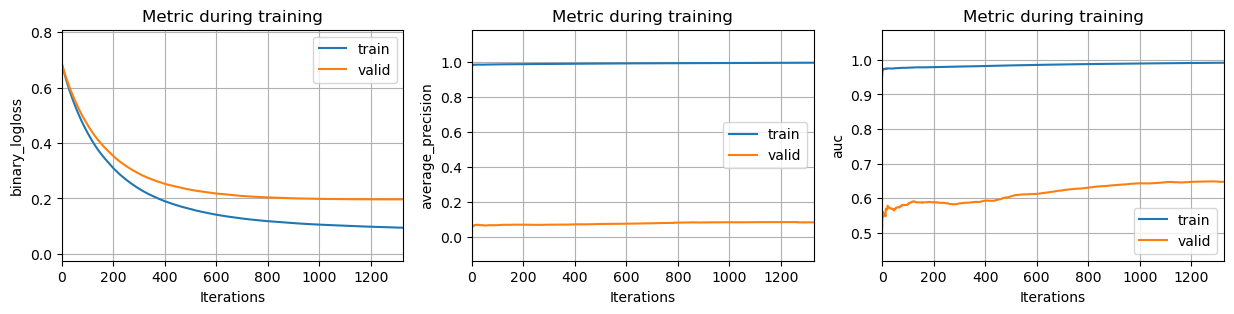

<Figure size 640x480 with 0 Axes>

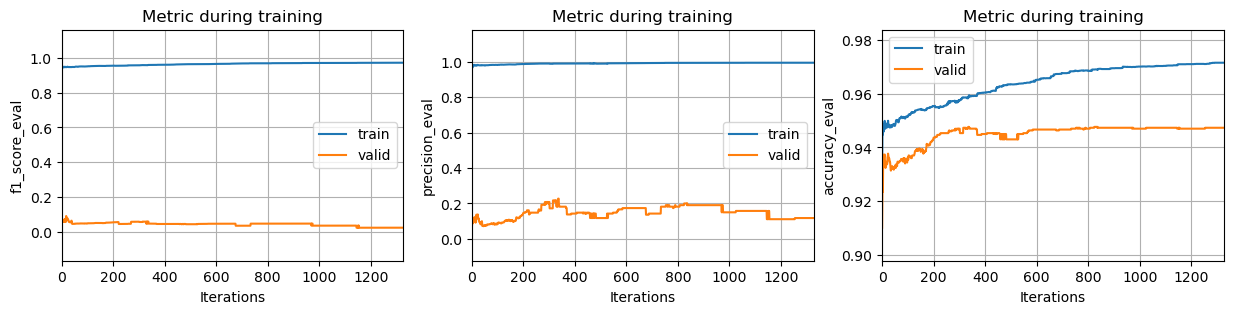

<Figure size 640x480 with 0 Axes>

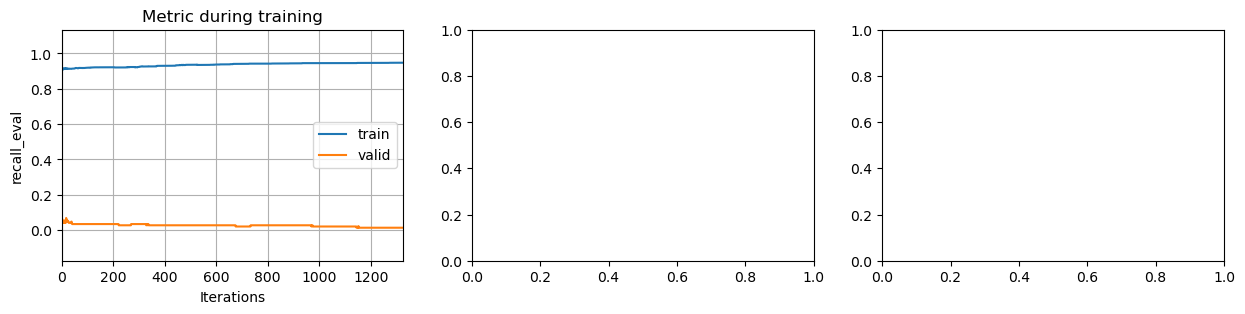

<Figure size 640x480 with 0 Axes>

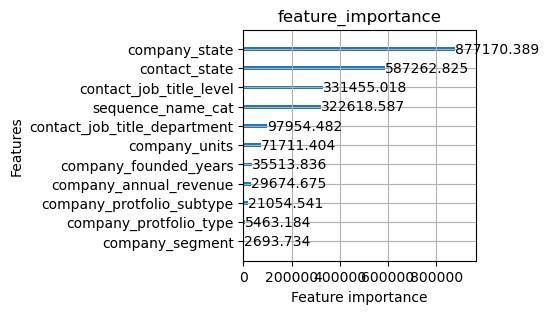

In [153]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from ds_lib import f1_score_eval, lgm_train_plot, precision_eval, accuracy_eval, recall_eval

LGB_METRICS = [
    'binary_logloss',
    'average_precision',
    'auc',
    f1_score_eval,
    precision_eval,
    accuracy_eval,
    recall_eval
]

lgbm_params = {'boosting_type': 'gbdt',
               'objective': 'binary',
               'n_jobs': -1,
               'n_estimators': 8000,
               'learning_rate': 0.005,
               'max_depth': 25,
               'colsample_bytree': 0.75,
               #              'min_split_gain': 5,
               'num_leaves': 30,
               'reg_alpha': 1.5,
               'reg_lambda': 1.5,
               'max_bin': 200,
               'subsample': 0.90,
               'subsample_freq': 40,  #0 means disable bagging; k means perform bagging at every k iteration
               'min_child_samples': 20,
               'importance_type': 'gain',
               # 'is_unbalance': True,
               }
lightgbm_model = lgb.LGBMClassifier(**lgbm_params)

early_stopping_callback = early_stopping(
    stopping_rounds=50,
    first_metric_only=True
)
log_evaluation_callback = log_evaluation(period=100, show_stdv=True)

callbacks = [early_stopping_callback, log_evaluation_callback]

lgb_fit_params = {
    'eval_set': [(X_train_re, y_train_re), (X_valid, y_valid)],
    'eval_names': ['train', 'valid'],
    'eval_metric': LGB_METRICS,
    'callbacks': callbacks,

}

lightgbm_model.fit(X_train_re, y_train_re, **lgb_fit_params)

lgm_train_plot(model=lightgbm_model,
               prcss=lightgbm_model.evals_result_,
               metrics=LGB_METRICS,  #'binary_logloss'
               max_num_features=200,
               imp_type='gain')

### - penetration 
### - selection bias 1000 - 1500 units

In [154]:
lightgbm_model_copy = lightgbm_model

LGBMClassifier Train Set (Threshold: 0.0159)
Log_loss: 0.0958
Accuracy : 0.5584
Recall : 1.0
Precision : 0.531
F1: 0.6937
AUC_PRC: 0.9936
AUC_ROC: 0.9916


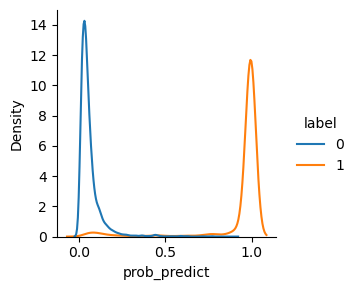

<Figure size 300x300 with 0 Axes>

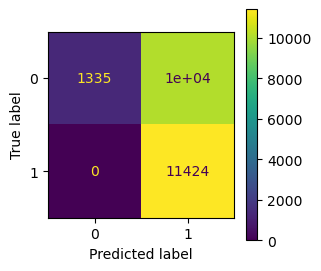

KS Table : 

ks_value is 92.79 at pop = 0.5


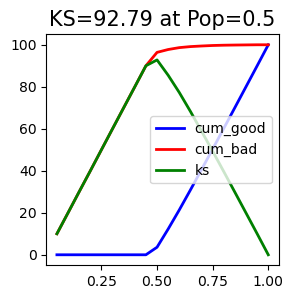

pop   min_scr   max_scr  bads  goods  total    odds bad_rate bad_cum_pct  \
0   0.05  0.998135  0.998316  1143      0   1143    0.00  100.00%      10.01%   
1   0.10  0.997992  0.998134  1140      0   1140    0.00  100.00%      19.98%   
2   0.15  0.997825  0.997991  1145      0   1145    0.00  100.00%      30.01%   
3   0.20  0.997520  0.997824  1134      0   1134    0.00  100.00%      39.93%   
4   0.25  0.997185  0.997519  1149      0   1149    0.00  100.00%      49.99%   
5   0.30  0.996348  0.997185  1144      0   1144    0.00  100.00%      60.01%   
6   0.35  0.994407  0.996342  1142      0   1142    0.00  100.00%      70.00%   
7   0.40  0.987006  0.994400  1140      0   1140    0.00  100.00%      79.98%   
8   0.45  0.907873  0.986984  1145      0   1145    0.00  100.00%      90.00%   
9   0.50  0.191581  0.907760   729    411   1140    0.56   63.95%      96.38%   
10  0.55  0.108031  0.191514   155    989   1144    6.38   13.55%      97.74%   
11  0.60  0.076195  0.107919   103   1040   1143   10.10    9.01%      98.64%   
12  0.65  0.060230  0.076189    56   1085   1141   19.38    4.91%      99.13%   
13  0.70  0.049742  0.060221    33   1110   1143   33.64    2.89%      99.42%   
14  0.75  0.041384  0.049741    27   1116   1143   41.33    2.36%      99.66%   
15  0.80  0.034942  0.041381    16   1126   1142   70.38    1.40%      99.80%   
16  0.85  0.029075  0.034939     9   1133   1142  125.89    0.79%      99.88%   
17  0.90  0.022282  0.029067     7   1135   1142  162.14    0.61%      99.94%   
18  0.95  0.015017  0.022254     7   1136   1143  162.29    0.61%     100.00%   
19  1.00  0.006021  0.014978     0   1143   1143     inf    0.00%     100.00%   

   good_cum_pct     ks    max  
0         0.00%  10.01         
1         0.00%  19.98         
2         0.00%  30.01         
3         0.00%  39.93         
4         0.00%  49.99         
5         0.00%  60.01         
6         0.00%  70.00         
7         0.00%  79.98         
8         0.00%  90.00         
9         3.60%  92.79  <----  
10       12.25%  85.49         
11       21.36%  77.28         
12       30.86%  68.28         
13       40.57%  58.85         
14       50.34%  49.32         
15       60.20%  39.60         
16       70.12%  29.76         
17       80.05%  19.89         
18       89.99%  10.01         
19      100.00%  -0.00

ROC PLOT :


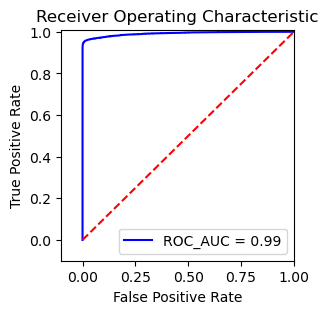

PRC PLOT :


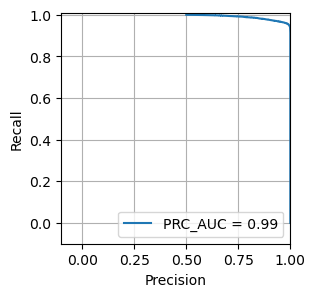


******************************
LGBMClassifier Validation Set (Threshold: 0.0159)
Log_loss: 0.1967
Accuracy : 0.1563
Recall : 0.9655
Precision : 0.0525
F1: 0.0996
AUC_PRC: 0.0828
AUC_ROC: 0.6487


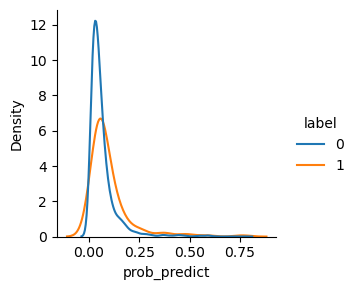

<Figure size 300x300 with 0 Axes>

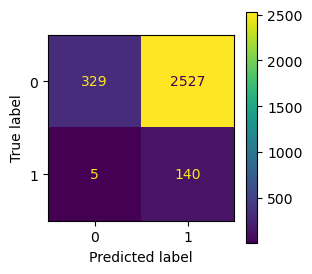

KS Table : 

ks_value is 24.47 at pop = 0.45


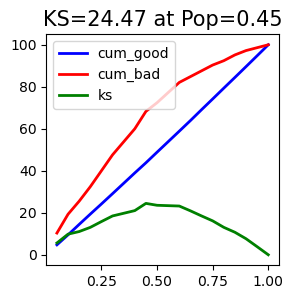

pop   min_scr   max_scr  bads  goods  total   odds bad_rate bad_cum_pct  \
0   0.05  0.183766  0.766981    15    135    150   9.00   10.00%      10.34%   
1   0.10  0.133972  0.183654    13    136    149  10.46    8.72%      19.31%   
2   0.15  0.104227  0.133785     9    142    151  15.78    5.96%      25.52%   
3   0.20  0.087250  0.103830    10    140    150  14.00    6.67%      32.41%   
4   0.25  0.075545  0.087072    11    138    149  12.55    7.38%      40.00%   
5   0.30  0.066718  0.075507    11    140    151  12.73    7.28%      47.59%   
6   0.35  0.060448  0.066583     9    141    150  15.67    6.00%      53.79%   
7   0.40  0.054076  0.060428     9    141    150  15.67    6.00%      60.00%   
8   0.45  0.049149  0.054065    12    138    150  11.50    8.00%      68.28%   
9   0.50  0.044972  0.049124     6    144    150  24.00    4.00%      72.41%   
10  0.55  0.040745  0.044970     7    143    150  20.43    4.67%      77.24%   
11  0.60  0.037191  0.040710     7    143    150  20.43    4.67%      82.07%   
12  0.65  0.033349  0.037137     4    144    148  36.00    2.70%      84.83%   
13  0.70  0.029753  0.033345     4    148    152  37.00    2.63%      87.59%   
14  0.75  0.026357  0.029723     4    146    150  36.50    2.67%      90.34%   
15  0.80  0.022233  0.026312     3    147    150  49.00    2.00%      92.41%   
16  0.85  0.018400  0.022232     4    146    150  36.50    2.67%      95.17%   
17  0.90  0.015368  0.018387     3    147    150  49.00    2.00%      97.24%   
18  0.95  0.011658  0.015367     2    148    150  74.00    1.33%      98.62%   
19  1.00  0.006154  0.011638     2    149    151  74.50    1.32%     100.00%   

   good_cum_pct     ks    max  
0         4.73%   5.62         
1         9.49%   9.82         
2        14.46%  11.06         
3        19.36%  13.05         
4        24.19%  15.81         
5        29.10%  18.49         
6        34.03%  19.76         
7        38.97%  21.03         
8        43.80%  24.47  <----  
9        48.84%  23.57         
10       53.85%  23.39         
11       58.86%  23.21         
12       63.90%  20.93         
13       69.08%  18.50         
14       74.19%  16.15         
15       79.34%  13.07         
16       84.45%  10.72         
17       89.60%   7.64         
18       94.78%   3.84         
19      100.00%   0.00

ROC PLOT :


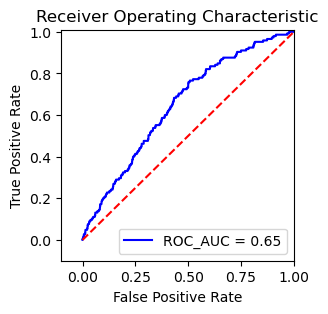

PRC PLOT :


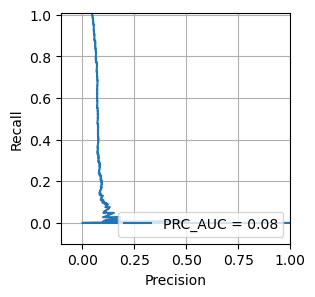


******************************
LGBMClassifier Test Set (Threshold: 0.0159)
Log_loss: 0.1936
Accuracy : 0.152
Recall : 0.9834
Precision : 0.053
F1: 0.1007
AUC_PRC: 0.0949
AUC_ROC: 0.662


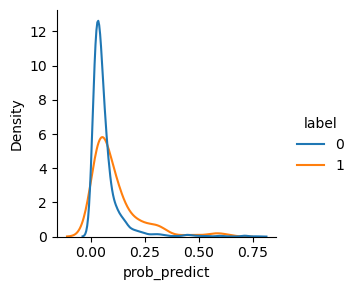

<Figure size 300x300 with 0 Axes>

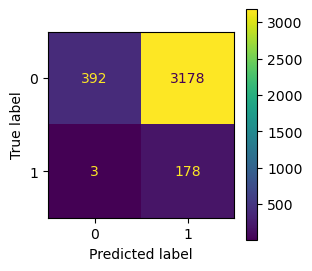

KS Table : 

ks_value is 23.11 at pop = 0.2


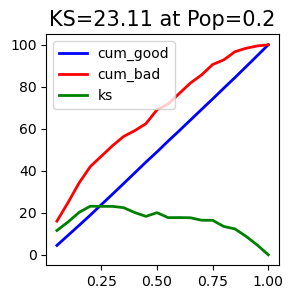

pop   min_scr   max_scr  bads  goods  total    odds bad_rate bad_cum_pct  \
0   0.05  0.194798  0.766981    29    159    188    5.48   15.43%      16.02%   
1   0.10  0.134429  0.194590    16    171    187   10.69    8.56%      24.86%   
2   0.15  0.105582  0.134419    17    171    188   10.06    9.04%      34.25%   
3   0.20  0.085350  0.105475    14    173    187   12.36    7.49%      41.99%   
4   0.25  0.074064  0.085340     9    179    188   19.89    4.79%      46.96%   
5   0.30  0.066313  0.074044     9    178    187   19.78    4.81%      51.93%   
6   0.35  0.059173  0.066297     8    180    188   22.50    4.26%      56.35%   
7   0.40  0.052572  0.059134     5    182    187   36.40    2.67%      59.12%   
8   0.45  0.047831  0.052557     6    182    188   30.33    3.19%      62.43%   
9   0.50  0.043988  0.047817    12    175    187   14.58    6.42%      69.06%   
10  0.55  0.040394  0.043975     5    183    188   36.60    2.66%      71.82%   
11  0.60  0.036500  0.040343     9    176    185   19.56    4.86%      76.80%   
12  0.65  0.033463  0.036378     9    181    190   20.11    4.74%      81.77%   
13  0.70  0.030071  0.033418     7    180    187   25.71    3.74%      85.64%   
14  0.75  0.026651  0.030067     9    179    188   19.89    4.79%      90.61%   
15  0.80  0.023384  0.026632     4    183    187   45.75    2.14%      92.82%   
16  0.85  0.019405  0.023327     7    180    187   25.71    3.74%      96.69%   
17  0.90  0.015501  0.019396     3    185    188   61.67    1.60%      98.34%   
18  0.95  0.011956  0.015480     2    186    188   93.00    1.06%      99.45%   
19  1.00  0.006154  0.011928     1    187    188  187.00    0.53%     100.00%   

   good_cum_pct     ks    max  
0         4.45%  11.57         
1         9.24%  15.62         
2        14.03%  20.22         
3        18.88%  23.11  <----  
4        23.89%  23.07         
5        28.88%  23.05         
6        33.92%  22.43         
7        39.02%  20.10         
8        44.12%  18.31         
9        49.02%  20.04         
10       54.15%  17.68         
11       59.08%  17.72         
12       64.15%  17.62         
13       69.19%  16.45         
14       74.20%  16.41         
15       79.33%  13.49         
16       84.37%  12.32         
17       89.55%   8.79         
18       94.76%   4.69         
19      100.00%  -0.00

ROC PLOT :


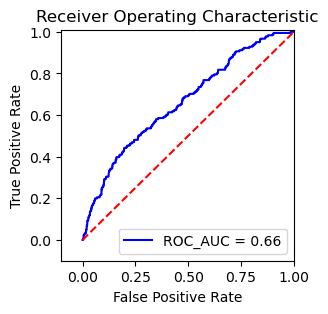

PRC PLOT :


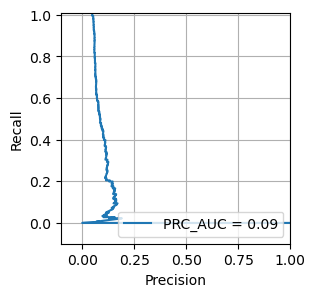

Log_loss  Accuracy   AUC_ROC   AUC_PRC    Recall  Precision        F1  \
Train  0.095816  0.558430  0.991593  0.993591  1.000000   0.531028  0.693688   
Valid  0.196697  0.156281  0.648651  0.082762  0.965517   0.052493  0.099573   
Test   0.193586  0.151959  0.661988  0.094931  0.983425   0.053039  0.100650   

          KS  KS_pop  
Train  92.79    0.50  
Valid  24.47    0.45  
Test   23.11    0.20

In [155]:

from ds_lib import model_evaluation_bc

eval_result = model_evaluation_bc(X_train=X_train_re,
                                  Y_train=y_train_re,
                                  X_val=X_valid,
                                  Y_val=y_valid,
                                  X_test=X_test,
                                  Y_test=y_test,
                                  model=lightgbm_model,
                                  prob_threshold=0.0159,
                                  ks_group_num=20,
                                  enable_score=False)

In [193]:
def get_top_sequence_category(top_n: int, case_index: int):
    # find all the Sequence_cat 
    all_sequence_cat = X['sequence_name_cat'].unique().tolist()
    # all_sequence_cat

    # for a specific deal target with pmc and contact
    test_case = X_test[case_index:case_index + 1]
    # test_case
    df_test_case_score = pd.DataFrame();
    for seq_cat in all_sequence_cat:
        new_df = test_case.copy()
        new_df['sequence_name_cat'] = seq_cat
        new_df['sequence_name_cat'] = new_df['sequence_name_cat'].astype('category')
        new_df['score'] = Prob2Score(lightgbm_model.predict_proba(new_df)[:, 1][0], 600, 100)
        df_test_case_score = pd.concat([df_test_case_score, new_df])
    df_test_case_score.sort_values(by='score', ascending=False, inplace=True)
    # df_test_case_score
    print('For test case: ')
    test_case_name_back = test_case.drop(columns=['sequence_name_cat'])
    # test_case_name_back = test_case.copy()
    for col in test_case_name_back.columns:
        if col in class_map:
            test_case_name_back[col] = test_case_name_back[col].map(class_map[col])
    display(test_case_name_back)
    # top_n = 5
    print(f'Top {top_n} sequence categories: ')
    df_test_case_score['sequence_name_cat_back'] = df_test_case_score['sequence_name_cat'].map(
        class_map['sequence_name_cat'])
    display(df_test_case_score[0:top_n][['sequence_name_cat_back', 'sequence_name_cat', 'score']])
    return df_test_case_score[0:top_n]

In [157]:
get_top_sequence_category(5, 100)

For test case: 


contact_job_title_level contact_job_title_department  \
11739                 Manager                     Business   

      company_protfolio_type company_protfolio_subtype company_segment  \
11739           Multi Family                   MISSING             SMB   

      company_state contact_state  company_annual_revenue  company_units  \
11739            PA  Pennsylvania              10000000.0           2350   

       company_founded_years  
11739                   29.0

Top 5 sequence categories: 


sequence_name_cat_back sequence_name_cat  score
11739                      2nd Multi Touch                 0    652
11739                                Conam                 9    651
11739                            Nov. Seq.                29    628
11739  Spencer Multi Touch Master Sequence                37    622
11739        JM Email Sequence June / July                18    612

In [158]:
get_top_sequence_category(5, 101)

For test case: 


contact_job_title_level contact_job_title_department  \
15115                 missing                      missing   

      company_protfolio_type company_protfolio_subtype company_segment  \
15115           Multi Family              Conventional             SMB   

      company_state contact_state  company_annual_revenue  company_units  \
15115            NJ       MISSING            5.223998e+07           3843   

       company_founded_years  
15115              36.294056

Top 5 sequence categories: 


sequence_name_cat_back sequence_name_cat  score
15115         Spencer Multi Touch Master Sequence                37    381
15115                             2nd Multi Touch                 0    373
15115                                       Conam                 9    369
15115  Ariel/Fiona Feb/March 2023 - cold outreach                 5    363
15115                     Ally Yates Feb Seq 2023                 3    341

In [210]:
import os
import openai
# import gpt4all
from langchain.document_loaders import UnstructuredURLLoader
from langchain.chains.summarize import load_summarize_chain
from langchain.llms import OpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
import json
import boto3

endpoint_name = "jumpstart-dft-meta-textgeneration-llama-2-70b-f-v3"


def query_endpoint(payload):
    client = boto3.client("sagemaker-runtime")
    response = client.invoke_endpoint(
        EndpointName=endpoint_name,
        ContentType="application/json",
        Body=json.dumps(payload),
        CustomAttributes="accept_eula=true",
    )
    response = response["Body"].read().decode("utf8")
    response = json.loads(response)
    return response

In [202]:
import json

file_name = '../data/email_template.json'
with open(file_name, 'r') as json_file:
    # Load the JSON data from the file
    email_templates = json.load(json_file)
# email_template

In [212]:

def generate_reachout_email(top_n, case_index, step_id):
    seq_cats = get_top_sequence_category(top_n, case_index)['sequence_name_cat_back'].to_list()
    display(seq_cats)
    emails = [email_template['template_content'] for seq_cat in seq_cats for email_template in email_templates if
              email_template['sequence_name'] == seq_cat and email_template['step'] == step_id]
    emails_str = "\n\n".join(emails)
    print(emails_str)
    content = f"Here are some sales reachout email examples:\n{emails_str}.\n generate a professional sales reachout email based on the examples above"
    question = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": content}
    ]
    # print(question)
    payload = {
        "inputs": [question],
        "parameters": {"max_new_tokens": 500, "top_p": 0.9, "temperature": 0.9}
    }
    result = query_endpoint(payload)[0]
    print("*" * 100)
    print(result['generation']['content'])


generate_reachout_email(3, 0, 0)

For test case: 


contact_job_title_level contact_job_title_department  \
8055                 Manager                     Business   

     company_protfolio_type company_protfolio_subtype company_segment  \
8055           Multi Family              Conventional      Mid Market   

     company_state contact_state  company_annual_revenue  company_units  \
8055            CA       MISSING              10000000.0           8253   

      company_founded_years  
8055                   63.0

Top 3 sequence categories: 


sequence_name_cat_back sequence_name_cat  score
8055                      2nd Multi Touch                 0    481
8055        JM Email Sequence June / July                18    475
8055  Spencer Multi Touch Master Sequence                37    464

['2nd Multi Touch',
 'JM Email Sequence June / July',
 'Spencer Multi Touch Master Sequence']

Contact: First name,
I'm reaching out to introduce Flex and see if we align with your current operational objectives. 
How Flex works is very simple:
We pay your resident's rent in full on the 1st of every month
They pay us back on a flexible schedule throughout the month
How Flex can benefit Contact: Company name:
Ensures rent is collected in full on the 1st of each month
Limits evictions and unnecessary turnover costs
Provides meaningful rental assistance to residents
Currently, we work with 500+ multifamily operators (5 million units) including companies like Sares-Regis, BH Management, and Harbor Group. 
Are you available to discuss further? Let's schedule a call. 

Hey Contact: First name​, 
 Reaching out to inform you that Flex is available as a free add-on in Company. 
 Flex highlights: 
 Guaranteed funds paid in full when rent is due (no chargebacks or NSFs) 
 Luxury, affordable, and everyone in between uses our service 
 Residents 2x more likely to renew their lease 
 Quick - 

In [213]:
generate_reachout_email(2, 0, 0)

For test case: 


contact_job_title_level contact_job_title_department  \
8055                 Manager                     Business   

     company_protfolio_type company_protfolio_subtype company_segment  \
8055           Multi Family              Conventional      Mid Market   

     company_state contact_state  company_annual_revenue  company_units  \
8055            CA       MISSING              10000000.0           8253   

      company_founded_years  
8055                   63.0

Top 2 sequence categories: 


sequence_name_cat_back sequence_name_cat  score
8055                2nd Multi Touch                 0    481
8055  JM Email Sequence June / July                18    475

['2nd Multi Touch', 'JM Email Sequence June / July']

Contact: First name,
I'm reaching out to introduce Flex and see if we align with your current operational objectives. 
How Flex works is very simple:
We pay your resident's rent in full on the 1st of every month
They pay us back on a flexible schedule throughout the month
How Flex can benefit Contact: Company name:
Ensures rent is collected in full on the 1st of each month
Limits evictions and unnecessary turnover costs
Provides meaningful rental assistance to residents
Currently, we work with 500+ multifamily operators (5 million units) including companies like Sares-Regis, BH Management, and Harbor Group. 
Are you available to discuss further? Let's schedule a call. 

Hey Contact: First name​, 
 Reaching out to inform you that Flex is available as a free add-on in Company. 
 Flex highlights: 
 Guaranteed funds paid in full when rent is due (no chargebacks or NSFs) 
 Luxury, affordable, and everyone in between uses our service 
 Residents 2x more likely to renew their lease 
 Quick - 

In [214]:
generate_reachout_email(2, 10, 0)

For test case: 


contact_job_title_level contact_job_title_department  \
7121                 C_level           Overall_Management   

     company_protfolio_type company_protfolio_subtype company_segment  \
7121           Multi Family              Conventional             SMB   

     company_state contact_state  company_annual_revenue  company_units  \
7121            IL            IL              10000000.0           3551   

      company_founded_years  
7121                   34.0

Top 2 sequence categories: 


sequence_name_cat_back sequence_name_cat  score
7121                  Conam                 9    436
7121        2nd Multi Touch                 0    394

['Conam', '2nd Multi Touch']

Hi Contact: First name​,
 I'm reaching out to introduce Flex and see if we'd be a good fit for your properties.
 Flex provides your properties with a seamless, cost-free payment method, ensuring your properties receive rent in full and on time every month.
 Here's how Flex works is easy:
 We pay your residents' rent in full on the 1st of each month 
 Residents have the flexibility to repay us on a schedule that suits them throughout the month 
 It's as simple as that – you get your rent on time, and residents have the freedom they need. 
 If you're interested in discovering the numerous benefits that Flex can bring to your community, we would be thrilled to schedule a Zoom call and provide you with all the details. 
 Please feel free to direclty Book a Meeting on my calendar. 
 We're excited about the opportunity to discuss Flex further and look forward to connecting with you soon!

Contact: First name,
I'm reaching out to introduce Flex and see if we align with your current operationa

In [218]:
generate_reachout_email(3, 100, 2)

For test case: 


contact_job_title_level contact_job_title_department  \
11739                 Manager                     Business   

      company_protfolio_type company_protfolio_subtype company_segment  \
11739           Multi Family                   MISSING             SMB   

      company_state contact_state  company_annual_revenue  company_units  \
11739            PA  Pennsylvania              10000000.0           2350   

       company_founded_years  
11739                   29.0

Top 3 sequence categories: 


sequence_name_cat_back sequence_name_cat  score
11739        2nd Multi Touch                 0    652
11739                  Conam                 9    651
11739              Nov. Seq.                29    628

['2nd Multi Touch', 'Conam', 'Nov. Seq.']

Contact: First name,
I’m following up on my email regarding our flexible rent payment product that has been popular among operators and renters nationwide. A couple of quick notes about Flex:
Ensures you're paid in full, on time
Enables you to improve rent collection rates and lower delinquencies 
Provides renters with a flexible rent payment option at no risk to you
Would you be open to discuss further? Let's schedule a call. 

Hello Contact: First name​,
Flex is an app that's integrated with your Property Management Software. Would it be fair to say some residents would choose option 3?
Option 1: ACH - Yes, maybe you get paid in full, but what goes on behind closed doors? Not everyone gets paid the same way. Do they have enough cash on hand to live life?
Option 2: Credit Card - It comes with a high transactional fee and leaves residents with high-interest debt, which may impact their ability to pay you in the future.
Option 3 - Flex Pays rent in full on the 1st; renters pay half now 

In [220]:
pq = """
If my customer has roommates, can Flex pay only his/her portion of the rent?
"""
question = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user",
     "content": """Here's question from partner: '{}'. provide an appropriate response email""".format(pq)},
]
payload = {
    "inputs": [question],
    "parameters": {"max_new_tokens": 250, "top_p": 0.9, "temperature": 0.6}
}
result = query_endpoint(payload)[0]
print(result['generation']['content'])


 Subject: Request for Flex Rent Payment for Shared Living Space

Dear [Partner's Name],

Thank you for reaching out to us with your question. We understand that in shared living spaces, it can be challenging to manage rent payments, especially when it comes to splitting the cost among roommates.

Flex offers a convenient solution for such situations. Our rent payment feature allows for individualized payment plans, which means that each roommate can pay their portion of the rent directly to the landlord through our platform. This way, everyone can contribute their share of the rent on time, without the need for manual calculations or reimbursements.

To set up a Flex rent payment plan for a shared living space, the landlord will need to create a single Flex account for the entire property. Each roommate will then need to create their own Flex account and link it to the main property account. Once all roommates have linked their accounts, they can start making payments directly to the l

In [135]:
snc = 'JES - OON renters want Flex (small)'

df_sequence_filter[df_sequence_filter['sequence_name_cat'] == snc][['SEQUENCE_NAME', 'SEQUENCE_ID']].value_counts()

SEQUENCE_NAME                        SEQUENCE_ID
JES - OON renters want Flex (small)  91074975       182
dtype: int64

In [128]:
df_sequence_filter[df_sequence_filter['sequence_name_cat'].str.startswith('Fiona/Zach')]

OCCURRED_DATE  SEQUENCE_ID      SEQUENCE_NAME  STEP_ID  TEMPLATE_ID  \
1677        20230614     80255635  Fiona/Zach April         1     40767517   
1678        20230623     80255635  Fiona/Zach April         4     40767537   
1679        20230608     80255635  Fiona/Zach April         0     40767516   
1680        20230629     80255635  Fiona/Zach April         5     40767520   
1681        20230620     80255635  Fiona/Zach April         3     40767534   
...              ...          ...                ...      ...          ...   
78668       20230509     80255635  Fiona/Zach April         0     40767516   
78669       20230523     80255635  Fiona/Zach April         3     40767534   
78670       20230602     80255635  Fiona/Zach April         5     40767520   
78671       20230515     80255635  Fiona/Zach April         1     40767517   
78672       20230526     80255635  Fiona/Zach April         4     40767537   

       SEQUENCE_ENROLLMENT_ID       SEQUENCE_STEP_EXCUTION_ID  CONTACT_ID  \
1677               7210916269  80255635-1675455260-7210916269    59468751   
1678               7210916272  80255635-1675455260-7210916272    59468751   
1679               7210916268  80255635-1675455260-7210916268    59468751   
1680               7210916273  80255635-1675455260-7210916273    59468751   
1681               7210916271  80255635-1675455260-7210916271    59468751   
...                       ...                             ...         ...   
78668              6964014944  80255635-1619697277-6964014944    59339701   
78669              6964014939  80255635-1619697276-6964014939    59339451   
78670              6964014949  80255635-1619697277-6964014949    59339701   
78671              6964014945  80255635-1619697277-6964014945    59339701   
78672              6964014948  80255635-1619697277-6964014948    59339701   

      CONTACT_FIRST_NAME CONTACT_LAST_NAME  CONTACT_COMPANY_ID  \
1677             Natalie           Reschke          7491147065   
1678             Natalie           Reschke          7491147065   
1679             Natalie           Reschke          7491147065   
1680             Natalie           Reschke          7491147065   
1681             Natalie           Reschke          7491147065   
...                  ...               ...                 ...   
78668                Jon         Stollberg          7030398327   
78669               Mike         DeGennaro          7030398327   
78670                Jon         Stollberg          7030398327   
78671                Jon         Stollberg          7030398327   
78672                Jon         Stollberg          7030398327   

      CONTACT_COMPANY_NAME  SENT_COUNT  REPLY_COUNT  OPEN_COUNT  \
1677   Location Properties           1            0           1   
1678   Location Properties           1            0           2   
1679   Location Properties           1            0           1   
1680   Location Properties           1            0           2   
1681   Location Properties           1            0           1   
...                    ...         ...          ...         ...   
78668  Combined Properties           1            0           0   
78669  Combined Properties           1            0           0   
78670  Combined Properties           1            0           0   
78671  Combined Properties           1            0           0   
78672  Combined Properties           1            0           0   

       MEETING_BOOKED_COUNT      CONTACT_UPDATE_DATE      CONTACT_CITY  \
1677                      0  2023-10-10 19:39:38.866          Lawrence   
1678                      0  2023-10-10 19:39:38.866          Lawrence   
1679                      0  2023-10-10 19:39:38.866          Lawrence   
1680                      0  2023-10-10 19:39:38.866          Lawrence   
1681                      0  2023-10-10 19:39:38.866          Lawrence   
...                     ...                      ...               ...   
78668                     0  

In [44]:
# find all the Sequence_cat 
all_sequence_cat = X['sequence_name_cat'].unique().tolist()
all_sequence_cat

# for a specific deal target with pmc and contact
test_case = X_test[0:1]
test_case

sequence_name_cat contact_job_title_level contact_job_title_department  \
2922                35                      10                            1   

     company_protfolio_type company_protfolio_subtype company_segment  \
2922                     10                        24               4   

     company_state contact_state  company_annual_revenue  company_units  \
2922            22            41              10000000.0           2900   

      company_founded_years  
2922                   28.0

In [34]:
def Prob2Score(prob, basePoint, PDO):
    y = np.log(prob / (1 - prob))
    if y == math.inf: y = 1000
    if y == -math.inf: y = -1000
    score = int(basePoint + PDO * y)
    # score = max(350,min(950,tmp))
    # print(y, score, prob)
    return score


In [56]:
df_test_case_score = pd.DataFrame();
for seq_cat in all_sequence_cat:
    new_df = test_case.copy()
    new_df['sequence_name_cat'] = seq_cat
    new_df['sequence_name_cat'] = new_df['sequence_name_cat'].astype('category')
    new_df['score'] = Prob2Score(lightgbm_model.predict_proba(new_df)[:, 1][0], 600, 100)
    df_test_case_score = pd.concat([df_test_case_score, new_df])
df_test_case_score.sort_values(by='score', ascending=False, inplace=True)
df_test_case_score

sequence_name_cat contact_job_title_level contact_job_title_department  \
2922                24                      10                            1   
2922                23                      10                            1   
2922                 3                      10                            1   
2922                 1                      10                            1   
2922                41                      10                            1   
2922                 0                      10                            1   
2922                 5                      10                            1   
2922                16                      10                            1   
2922                46                      10                            1   
2922                 4                      10                            1   
2922                10                      10                            1   
2922                 9                      10                            1   
2922                 8                      10                            1   
2922                39                      10                            1   
2922                40                      10                            1   
2922                20                      10                            1   
2922                12                      10                            1   
2922                32                      10                            1   
2922                45                      10                            1   
2922                14                      10                            1   
2922                27                      10                            1   
2922                28                      10                            1   
2922                33                      10                            1   
2922                42                      10                            1   
2922                34                      10                            1   
2922                 2                      10                            1   
2922                26                      10                            1   
2922                18                      10                            1   
2922                21                      10                            1   
2922                37                      10                            1   
2922                35                      10                            1   
2922                19                      10                            1   
2922                25                      10                            1   
2922                36                      10                            1   
2922                11                      10                            1   
2922                31                      10                            1   
2922                44                      10                            1   
2922                22                      10                            1   
2922                13                      10                            1   
2922                17                      10                            1   
2922                38                      10                            1   
2922                29                      10                            1   
2922                 6                      10                            1   
2922                43                      10                            1   
2922                30                      10                            1   
2922                15                      10                            1   
2922                 7                      10                            1   

     company_protfolio_type company_protfolio_subtype company_segment  \
2922                     10                        24               4   
2922                     10                        24             

In [60]:
# get the re-mapping
# result
print('For test case: ')
test_case_name_back = test_case.drop(columns=['sequence_name_cat'])
# test_case_name_back = test_case.copy()
for col in test_case_name_back.columns:
    if col in class_map:
        test_case_name_back[col] = test_case_name_back[col].map(class_map[col])
display(test_case_name_back)
top_n = 5
print(f'Top {top_n} sequence categories: ')
df_test_case_score['sequence_name_cat_back'] = df_test_case_score['sequence_name_cat'].map(
    class_map['sequence_name_cat'])
df_test_case_score[0:top_n][['sequence_name_cat_back', 'sequence_name_cat', 'score']]

For test case: 


contact_job_title_level contact_job_title_department  \
2922                 Manager                     Business   

     company_protfolio_type company_protfolio_subtype company_segment  \
2922           Multi Family                   MISSING             SMB   

     company_state contact_state  company_annual_revenue  company_units  \
2922            IN       MISSING              10000000.0           2900   

      company_founded_years  
2922                   28.0

Top 5 sequence categories: 


sequence_name_cat_back sequence_name_cat  score
2922  Micro Segment 2 - Deep SMB - 250-500                24    457
2922       March/April 23- calls, Allison                 23    455
2922               Ally Yates Feb Seq 2023                 3    441
2922                                 AK Q2                 1    422
2922   Spencer Multi Touch Master Sequence                41    421

In [63]:
def get_top_sequence_category(top_n: int, case_index: int):
    # find all the Sequence_cat 
    all_sequence_cat = X['sequence_name_cat'].unique().tolist()
    # all_sequence_cat

    # for a specific deal target with pmc and contact
    test_case = X_test[case_index:case_index + 1]
    # test_case
    df_test_case_score = pd.DataFrame();
    for seq_cat in all_sequence_cat:
        new_df = test_case.copy()
        new_df['sequence_name_cat'] = seq_cat
        new_df['sequence_name_cat'] = new_df['sequence_name_cat'].astype('category')
        new_df['score'] = Prob2Score(lightgbm_model.predict_proba(new_df)[:, 1][0], 600, 100)
        df_test_case_score = pd.concat([df_test_case_score, new_df])
    df_test_case_score.sort_values(by='score', ascending=False, inplace=True)
    # df_test_case_score
    print('For test case: ')
    test_case_name_back = test_case.drop(columns=['sequence_name_cat'])
    # test_case_name_back = test_case.copy()
    for col in test_case_name_back.columns:
        if col in class_map:
            test_case_name_back[col] = test_case_name_back[col].map(class_map[col])
    display(test_case_name_back)
    # top_n = 5
    print(f'Top {top_n} sequence categories: ')
    df_test_case_score['sequence_name_cat_back'] = df_test_case_score['sequence_name_cat'].map(
        class_map['sequence_name_cat'])
    display(df_test_case_score[0:top_n][['sequence_name_cat_back', 'sequence_name_cat', 'score']])


In [98]:
get_top_sequence_category(100, 45)

For test case: 


contact_job_title_level contact_job_title_department  \
12043                 missing                      missing   

      company_protfolio_type company_protfolio_subtype company_segment  \
12043           Multi Family              Conventional      Mid Market   

      company_state contact_state  company_annual_revenue  company_units  \
12043            CA       MISSING             250000000.0          10246   

       company_founded_years  
12043                   29.0

Top 100 sequence categories: 


sequence_name_cat_back sequence_name_cat  \
12043               Spencer Multi Touch Master Sequence                39   
12043                                   2nd Multi Touch                 0   
12043                   March/April 23- calls, Allison                 23   
12043                               Cory/Louis Feb 2023                10   
12043                                   Portal Sequence                33   
12043                                           budgets                43   
12043                                             Conam                 8   
12043        Ariel/Fiona Feb/March 2023 - cold outreach                 5   
12043                                 Fiona/Zach April                 14   
12043                                         Nov. Seq.                31   
12043                               Ally/Mina June/July                 4   
12043                             Rory June/July  Clone                37   
12043                                             AK Q2                 1   
12043                      Mina/Katie Feb 2023 Outreach                26   
12043                     JE Q2 Email Sequence - Emails                16   
12043                                     Rent-Burdened                35   
12043                     JM Email Sequence June / July                20   
12043                                   budgets (clone)                44   
12043                                    ZB June 2023 *                40   
12043               JES - OON renters want Flex (small)                18   
12043                                    New Year Start                30   
12043                     Cory NMHC Annual 2023 - Louis                 9   
12043                           AK shared - PM software                 2   
12043                Morgan Q2 Email Sequence - Emails                 27   
12043                           Ally Yates Feb Seq 2023                 3   
12043                                 Fiona/Ariel April                12   
12043                   Feb/March 2023 - cold out reach                11   
12043                                 Mina's June/July                 25   
12043                                KL SL Clone (feb)                 22   
12043                                         Rory-2023                38   
12043                                         Regionals                34   
12043  JES - OON renters want Flex (small) (Email only)                19   
12043                              ZI Intent (Sidonie)                 42   
12043                                One Pager Sequence                32   
12043                                        JM July 23                21   
12043                                           Reviews                36   
12043                                 New Sequence 6.23                29   
12043                            Mina Oct 2023 Outreach                24   
12043                                           ChatGPT                 7   
12043                               Multifamily Insider                28   
12043                              Fiona/Spencer April                 13   
12043                   JE shared - PM software (clone)                17   
12043                      JE Q2 Email Sequence - Calls                15   
12043                                          Benefits                 6   
12043                                        ZB October                41   

       score  
12043    473  
12043    452  
12043    446  
12043    437  
12043    431  
12043    431  
12043    421  
12043    396  
12043    387  
12043    387  
12043    382  
12043    375  
12043    366  
12043    359  
12043    356  
12043    352  
12043    340  
12043    340  
12043    334  
12043    330  
12043    330  
12043    316  
12043    310  
12043    310  
12043    307  
12043    307  
12043    302  
12043    299  
12043    290  
12043    279  
12043    275  
12043    2

In [ ]:
# find all the SEQUENCE_ID (category)

all_sequence_id = X['SEQUENCE_ID'].unique().tolist()

In [43]:
# score ranking according to SEQUENCE_ID
# for a specific deal target with pmc and contact
test_case = X_test[0:1]
test_case

SEQUENCE_ID contact_job_title_level contact_job_title_department  \
2173     75636876                      14                            1   

     company_protfolio_type company_protfolio_subtype company_segment  \
2173                     17                        11               1   

     company_state contact_state  company_annual_revenue  company_units  \
2173            53            64              10000000.0          24411   

      company_founded_years  
2173                   54.0

In [44]:
# def Prob2Score(prob,basePoint,PDO):
#     y = np.log(prob/(1 - prob))
#     if y == math.inf: y=1000
#     if y == -math.inf: y=-1000
#     print(y, prob)
#     tmp = int(basePoint - PDO * y)
#     score = max(350,min(950,tmp))
#     print(y, score, prob)
#     return score
def Prob2Score(prob, basePoint, PDO):
    y = np.log(prob / (1 - prob))
    if y == math.inf: y = 1000
    if y == -math.inf: y = -1000
    score = int(basePoint + PDO * y)
    # score = max(350,min(950,tmp))
    # print(y, score, prob)
    return score

In [45]:
df_test_case_score = pd.DataFrame();
for seq_id in all_sequence_id:
    new_df = test_case.copy()
    new_df['SEQUENCE_ID'] = seq_id
    new_df['score'] = Prob2Score(lightgbm_model.predict_proba(new_df)[:, 1][0], 600, 100)
    df_test_case_score = pd.concat([df_test_case_score, new_df])

In [46]:
pd.options.display.max_rows = 250
df_test_case_score.sort_values(by=['score'], ascending=False, inplace=True)
display(df_test_case_score)

SEQUENCE_ID contact_job_title_level contact_job_title_department  \
2173     76373402                      14                            1   
2173     76742756                      14                            1   
2173     76760358                      14                            1   
2173     76746541                      14                            1   
2173     76766595                      14                            1   
2173     76712336                      14                            1   
2173     76737910                      14                            1   
2173     76517381                      14                            1   
2173     76684087                      14                            1   
2173     76537975                      14                            1   
2173     37046485                      14                            1   
2173      1758690                      14                            1   
2173     37380911                      14                            1   
2173     61595242                      14                            1   
2173     61529631                      14                            1   
2173     64225429                      14                            1   
2173     76361799                      14                            1   
2173     76372842                      14                            1   
2173     70457190                      14                            1   
2173     70468439                      14                            1   
2173     70608805                      14                            1   
2173     72790297                      14                            1   
2173     68775033                      14                            1   
2173     67382889                      14                            1   
2173     73453658                      14                            1   
2173     64955314                      14                            1   
2173     64532553                      14                            1   
2173     74504367                      14                            1   
2173     74720039                      14                            1   
2173     74522016                      14                            1   
2173     76256079                      14                            1   
2173     75580722                      14                            1   
2173     75878446                      14                            1   
2173     75585648                      14                            1   
2173     75304847                      14                            1   
2173     76230405                      14                            1   
2173     75824808                      14                            1   
2173     75668598                      14                            1   
2173     75715196                      14                            1   
2173     75636876                      14                            1   
2173     75616053                      14                            1   
2173     75589554                      14                            1   
2173     75592288                      14                            1   
2173     78339886                      14                            1   
2173     78333524                      14                            1   
2173     78418481                      14                            1   
2173     78313545                      14                            1   
2173     78299260                      14                            1   
2173     78299240                      14                            1   
2173     76848042                      14                            1   
2173     76873242                      14                            1   
2173     76872842                      14                            1   
2173     76954393                      14                            1   
2173     7

In [52]:
# result
print('For test case: ')
test_case_name_back = test_case.drop(columns=['SEQUENCE_ID'])
for col in test_case_name_back.columns:
    if col in class_map:
        test_case_name_back[col] = test_case_name_back[col].map(class_map[col])
display(test_case_name_back)
top_n = 5
print(f'Top {top_n} sequence is: ')
df_test_case_score[0:top_n][['SEQUENCE_ID', 'score']]

For test case: 


contact_job_title_level contact_job_title_department  \
2173                      VP                     Business   

     company_protfolio_type company_protfolio_subtype company_segment  \
2173           Multi Family              Conventional      Enterprise   

     company_state contact_state  company_annual_revenue  company_units  \
2173            NY            NY              10000000.0          24411   

      company_founded_years  
2173                   54.0

Top 5 sequence is: 


SEQUENCE_ID  score
2173     76373402    371
2173     76742756    360
2173     76760358    359
2173     76746541    359
2173     76766595    355

In [59]:
df_sequence_20230101.iloc[2172, :]

OCCURRED_DATE                                                                                       20230208
SEQUENCE_ID                                                                                         76373402
SEQUENCE_NAME                                                                                ZB 2k23 Portal 
STEP_ID                                                                                                    4
TEMPLATE_ID                                                                                         38000054
SEQUENCE_ENROLLMENT_ID                                                                            6110315139
SEQUENCE_STEP_EXCUTION_ID                                                     76373402-1433700685-6110315139
CONTACT_ID                                                                                          21549901
CONTACT_FIRST_NAME                                                                                   Colleen
CONTACT_LAST_NAME  

### case study

In [61]:

deep_SMB_cases = df_sequence_20230101[df_sequence_20230101['COMPANY_SEGMENT'] == 'Deep SMB']
deep_SMB_cases

OCCURRED_DATE  SEQUENCE_ID  \
0           20230410     76684087   
1           20230922     90434194   
2           20230424     76684087   
3           20230414     76684087   
4           20230512     76684087   
...              ...          ...   
80686       20230328     80372739   
80687       20230228     78299240   
80688       20230130     76766595   
80689       20230331     80372739   
80690       20230223     78299240   

                                       SEQUENCE_NAME  STEP_ID  TEMPLATE_ID  \
0                                    Portal Sequence        0     37999983   
1                 Micro Segment 1 - Deep SMB - < 250        2     48653112   
2                                    Portal Sequence        2     38000003   
3                                    Portal Sequence        1     37999996   
4                                    Portal Sequence        4     38000054   
...                                              ...      ...          ...   
80686            Fiona April '23 Engagement Outreach        0     40789065   
80687  March '23 Engagement Outreach - Corporate Jen        3     39598208   
80688           Feb. '23 Engagement Outreach - Louis        2     38373706   
80689            Fiona April '23 Engagement Outreach        3     40789268   
80690  March '23 Engagement Outreach - Corporate Jen        0     39597947   

       SEQUENCE_ENROLLMENT_ID       SEQUENCE_STEP_EXCUTION_ID  CONTACT_ID  \
0                  6732583864  76684087-1568041278-6732583864       35548   
1                  8045771370  90434194-1858371402-8045771370       35548   
2                  6732583936  76684087-1568041278-6732583936       35548   
3                  6732583865  76684087-1568041278-6732583865       35548   
4                  6732583938  76684087-1568041278-6732583938       35548   
...                       ...                             ...         ...   
80686              6648737164  80372739-1549616422-6648737164    27393401   
80687              6387860607  78299240-1492460639-6387860607    23793851   
80688              6161589281  76766595-1445049777-6161589281    23793851   
80689              6648737167  80372739-1549616422-6648737167    27393401   
80690              6387860604  78299240-1492460639-6387860604    23793851   

      CONTACT_FIRST_NAME CONTACT_LAST_NAME  ...  COMPANY_PROTFOLIO_TYPE  \
0                  Chris         Honeycutt  ...            Multi Family   
1                  Chris         Honeycutt  ...            Multi Family   
2                  Chris         Honeycutt  ...            Multi Family   
3                  Chris         Honeycutt  ...            Multi Family   
4                  Chris         Honeycutt  ...            Multi Family   
...                  ...               ...  ...                     ...   
80686                Sue             Jones  ...                     NaN   
80687              Julia             Snake  ...                     NaN   
80688              Julia             Snake  ...                     NaN   
80689                Sue             Jones  ...                     NaN   
80690              Julia             Snake  ...                     NaN   

                 COMPANY_RENT_PORTAL  COMPANY_SEGMENT  COMPANY_STATE  \
0                                NaN         Deep SMB             CA   
1                                NaN         Deep SMB             CA   
2                                NaN         Deep SMB             CA   
3                                NaN         Deep SMB             CA   
4                                NaN         Deep SMB             CA   
...                              ...              ...            ...   
80686  Appfolio;RentManager;Paylease         Deep SMB             OK   
80687  Appfolio;RentManager;Paylease         Deep SMB             OK   
80688  Appfolio;RentManager;Paylease         Deep SMB             OK   
80689  Appfolio;RentManager;Paylease         Deep SMB             OK   
80690  

In [64]:
seq_contact_company_df_DSMB = seq_contact_company_df[seq_contact_company_df['company_segment'] == 'Deep SMB']
seq_contact_company_df_DSMB

SEQUENCE_ID  CONTACT_ID         CONTACT_COMPANY_NAME  send_count  \
2         37046485    58748001                     TestFlex           2   
5         37380911       26251        Windermere Commercial           4   
7         37380911       27350       Windermere Real Estate           4   
9         37380911       28262       Windermere Real Estate           4   
11        37380911       28501       Windermere Real Estate           4   
...            ...         ...                          ...         ...   
24533     91414143    59181301                    Fairgrove           1   
24534     91414143    59404201  Harvest Property Management           1   
24535     91414143    59487303                JK Management           1   
24536     91414143    59575451         Seattle Rental Group           1   
24537     91414143    59575501         Seattle Rental Group           1   

       reply_count  meeting_booked_count  open_count  \
2                0                     0           1   
5                0                     0           0   
7                0                     0           0   
9                0                     0           0   
11               1                     0           0   
...            ...                   ...         ...   
24533            0                     0           0   
24534            0                     0           0   
24535            0                     0           0   
24536            0                     0           1   
24537            0                     0           0   

                          contact_job_title contact_job_title_level  \
2                                      None                 missing   
5                              Broker/Owner                   Owner   
7                   Chief Financial Officer                 C_level   
9                          CEO/Co-President                 C_level   
11                             Co-President                 C_level   
...                                     ...                     ...   
24533                     Senior Accountant              Accountant   
24534                Accounting Coordinator              Accountant   
24535                             President                 C_level   
24536  Managing Leasing Broker & Specialist                  Broker   
24537              Administrative Assistant               Assistant   

      contact_job_title_department  ... company_segment company_state  \
2                          missing  ...        Deep SMB          None   
5               Overall_Management  ...        Deep SMB            WA   
7               Overall_Management  ...        Deep SMB            WA   
9               Overall_Management  ...        Deep SMB            WA   
11              Overall_Management  ...        Deep SMB            WA   
...                            ...  ...             ...           ...   
24533                      Finance  ...        Deep SMB            CA   
24534                      Finance  ...        Deep SMB            KS   
24535           Overall_Management  ...        Deep SMB            OR   
24536                     Business  ...        Deep SMB            WA   
24537                Administrator  ...        Deep SMB            WA   

      contact_state company_annual_revenue company_founded_year  \
2              None                    NaN                  NaN   
5              None             10000000.0                  NaN   
7              None             10000000.0                  NaN   
9              None             10000000.0                  NaN   
11             None             10000000.0                  NaN   
...             ...                    ...                  ...   
24533          None             10000000.0               1976.0   
24534          None                    NaN                  NaN   
24535            OR                    NaN                  NaN   
24536            WA              

In [84]:
# find a specific case with reply
seq_contact_company_df_DSMB_wr = seq_contact_company_df_DSMB[seq_contact_company_df_DSMB['reply_count'] > 0][:100]
seq_contact_company_df_DSMB_wr

SEQUENCE_ID  CONTACT_ID                  CONTACT_COMPANY_NAME  \
11       37380911       28501                Windermere Real Estate   
73       37380911       46506                Windermere Real Estate   
103      37380911     9892951            Assertive Management Group   
119      37380911    13641551               MBS Property Management   
171      37380911    24200001           Success Property Management   
233      37380911    45692402  Mutual Housing Association of Hawaii   
234      37380911    45692451  Mutual Housing Association of Hawaii   
279      37380911    58223001           Success Property Management   
306      37380911    58568451                Windermere Real Estate   
375      37380911    59097201                   Commerce Properties   
376      37380911    59097251                   Commerce Properties   
378      37380911    59097351                   Commerce Properties   
388      37380911    59149651                            UPholdings   
875      64225429    58563701       Scalzo Property Management, Inc   
1031     73453658       36540           Dunmire Property Management   
1086     73453658    46731802                  Gemstone Communities   
1147     73453658    58238851       Stewardship Property Management   
1254     75580722    58546751                      Lyon Real Estate   
2473     76230405       43638             Hartford Building Company   
2494     76230405       49213                     Petwin Properties   
2548     76230405    21174401            MENORAH HOUSING FOUNDATION   
2573     76230405    22353251               Palmer Asset Management   
2630     76230405    33288951            Goodale & Barbieri Company   
2665     76230405    40373901               Palmer Asset Management   
2702     76230405    53708951                           Jacob Grant   
3538     76373402    21435201               MCM Property Management   
3623     76373402    28141752                   North Bay Companies   
3747     76373402    37402901                     Upside Management   
3795     76373402    39368651       Integrated Multifamily Services   
3798     76373402    39393851        MLSullivan Property Management   
3902     76373402    44468801                Hayes Properties, Inc.   
3903     76373402    44468851                Hayes Properties, Inc.   
4050     76373402    57749451                     Upside Management   
4088     76373402    58076301           BlueSky Property Management   
4507     76373402    58668351                     Summit Management   
4825     76373402    59157451                                 Hover   
5087     76373402    59265801                   North Bay Companies   
5134     76373402    59272301               MCM Property Management   
5135     76373402    59272351               MCM Property Management   
5333     76517381    58898251       Chamberlain Property Management   
5410     76684087       21485                 Gaslight Property LLC   
5417     76684087       24352                       BRC Real Estate   
5420     76684087       25406             Brookhaven Property Group   
5456     76684087       29077                                Maleno   
5460     76684087       29302                  Bay Management Group   
5475     76684087       30255             College Housing Northwest   
5486     76684087       31038                            HLC Equity   
5554     76684087       34610               Daniel Management Group   
5558     76684087       34670           Fairmont Management Company   
5566     76684087       35226             CanAm Property Management   
5573     76684087       35535             J.W. Hunter Company, Inc.   
5582     76684087       35835                 4 Degrees Real Estate   
5654     76684087       41018     Constellation Property Management   
5707     76684087       46204                    AN Properties, LLC   
5748     76684087       49236                        Eberly Company   
5783     76684087     6809359 

In [85]:
case1 = seq_contact_company_df_DSMB_wr[seq_contact_company_df_DSMB_wr.index == 375]
case1

SEQUENCE_ID  CONTACT_ID CONTACT_COMPANY_NAME  send_count  reply_count  \
375     37380911    59097201  Commerce Properties           4            1   

     meeting_booked_count  open_count contact_job_title  \
375                     0           3   Director of Ops   

    contact_job_title_level contact_job_title_department  \
375                Director                   Operations   

    company_protfolio_type company_protfolio_subtype company_segment  \
375           Multi Family              Conventional        Deep SMB   

    company_state contact_state  company_annual_revenue  company_founded_year  \
375            OR            OR               1000000.0                2013.0   

     company_units  reply_count_binary  open_count_binary  \
375            780                   1                  1   

     meeting_booked_count_binary  company_founded_years  
375                            0                   10.0

In [83]:
all_steps_case1 = df_sequence_20230101[(df_sequence_20230101['SEQUENCE_ID'] == 37380911) & \
                                       (df_sequence_20230101['CONTACT_COMPANY_NAME'] == "Assertive Management Group") & \
                                       (df_sequence_20230101['CONTACT_ID'] == 9892951)]
all_steps_case1

OCCURRED_DATE  SEQUENCE_ID                        SEQUENCE_NAME  \
73408       20230406     37380911  Spencer Multi Touch Master Sequence   
73416       20230411     37380911  Spencer Multi Touch Master Sequence   

       STEP_ID  TEMPLATE_ID  SEQUENCE_ENROLLMENT_ID  \
73408        0     23702428              6723463978   
73416        1     23702429              6723463979   

            SEQUENCE_STEP_EXCUTION_ID  CONTACT_ID CONTACT_FIRST_NAME  \
73408  37380911-1565878040-6723463978     9892951              Terri   
73416  37380911-1565878040-6723463979     9892951              Terri   

      CONTACT_LAST_NAME  CONTACT_COMPANY_ID        CONTACT_COMPANY_NAME  \
73408            Austin          4280715563  Assertive Management Group   
73416            Austin          4280715563  Assertive Management Group   

       SENT_COUNT  REPLY_COUNT  OPEN_COUNT  MEETING_BOOKED_COUNT  \
73408           1            0           0                     0   
73416           1            1           1                     0   

           CONTACT_UPDATE_DATE CONTACT_CITY             CONTACT_COMPANY  \
73408  2023-10-13 19:00:03.878     Westwego  Assertive Management Group   
73416  2023-10-13 19:00:03.878     Westwego  Assertive Management Group   

      CONTACT_COUNTRY      CONTACT_CREATE_DATE  CONTACT_CREATE_TIMESTAMP  \
73408             NaN  2021-03-23 22:02:25.727             1616536945727   
73416             NaN  2021-03-23 22:02:25.727             1616536945727   

                    CONTACT_EAMIL CONTACT_FIRST_DEAL_CREATE_DATE  \
73408  cdcypress@assertivemgt.com                            NaN   
73416  cdcypress@assertivemgt.com                            NaN   

      CONTACT_ADDITIONAL_EMAIL CONTACT_EMAIL_DOMAIN    CONTACT_IP_TIMEZONE  \
73408                      NaN     assertivemgt.com  america_slash_chicago   
73416                      NaN     assertivemgt.com  america_slash_chicago   

       CONTACT_IS_UNWORKED CONTACT_LATEST_SEQUENCE_ENDED_DATE  \
73408                 True            2023-04-11 14:20:13.403   
73416                 True            2023-04-11 14:20:13.403   

       CONTACT_LATEST_SEQUENCE_ENDED_TIMESTAMP  \
73408                             1.681223e+12   
73416                             1.681223e+12   

      CONTACT_LATEST_SEQUENCE_ENROLLED_DATE  \
73408               2023-04-06 21:37:54.433   
73416               2023-04-06 21:37:54.433   

       CONTACT_LATEST_SEQUENCE_ENTROLLED_TIMESTAMP CONTACT_LEAD_STATUS  \
73408                                1680817074433           Expansion   
73416                                1680817074433           Expansion   

       CONTACT_SEQUENCES_ENROLLED_COUNT  CONTACT_SEQUENCES_IS_ENROLLED  \
73408                                 3                          False   
73416                                 3                          False   

       CONTACT_TIME_BETWEEN_CONTACT_CREATION_AND_DEAL_CREATION  \
73408                                                NaN         
73416                                                NaN         

       CONTACT_HUBSPOT_OWNER_ID  CONTACT_HUBSPOT_TEAM_ID CONTACT_JOB_TITLE  \
73408                 542832650                 34335131  Property Manager   
73416                 542832650                 34335131  Property Manager   

      CONTACT_LAST_MODIFIED_DATE  CONTACT_LAST_MODIFED_TIMESTAMP  \
73408    2023-10-13 19:00:03.878                   1697223603878   
73416    2023-10-13 19:00:03.878                   1697223603878   

      CONTACT_LEAD_SOURCE CONTACT_LINKEDIN CONTACT_MOBILE_PHONE  \
73408                 NaN              NaN                  NaN   
73416                 NaN              NaN                  NaN   

       CONTACT_NUM_ASSOCIATED_DEALS  CONTACT_NUM_CONTACTED_NOTES  \
73408                           NaN                            6   
73416                           NaN                            6   

      CONTACT_PHONE CONTACT_STATE  CONTACT_UNITS CONTACT_WEBSITE  \
73408  504-436-0274       

In [87]:
all_steps_case1 = df_sequence_20230101[(df_sequence_20230101['SEQUENCE_ID'] == 37380911) & \
                                       (df_sequence_20230101['CONTACT_COMPANY_NAME'] == "Commerce Properties") & \
                                       (df_sequence_20230101['CONTACT_ID'] == 59097201)]
all_steps_case1

OCCURRED_DATE  SEQUENCE_ID                        SEQUENCE_NAME  \
63015       20230502     37380911  Spencer Multi Touch Master Sequence   
63017       20230418     37380911  Spencer Multi Touch Master Sequence   
63018       20230411     37380911  Spencer Multi Touch Master Sequence   
63025       20230406     37380911  Spencer Multi Touch Master Sequence   

       STEP_ID  TEMPLATE_ID  SEQUENCE_ENROLLMENT_ID  \
63015        3     23702431              6723487368   
63017        2     23702430              6723487367   
63018        1     23702429              6723487366   
63025        0     23702428              6723487365   

            SEQUENCE_STEP_EXCUTION_ID  CONTACT_ID CONTACT_FIRST_NAME  \
63015  37380911-1566028906-6723487368    59097201              Danny   
63017  37380911-1566028906-6723487367    59097201              Danny   
63018  37380911-1566028906-6723487366    59097201              Danny   
63025  37380911-1566028906-6723487365    59097201              Danny   

      CONTACT_LAST_NAME  CONTACT_COMPANY_ID CONTACT_COMPANY_NAME  SENT_COUNT  \
63015           Jacques          4277717142  Commerce Properties           1   
63017           Jacques          4277717142  Commerce Properties           1   
63018           Jacques          4277717142  Commerce Properties           1   
63025           Jacques          4277717142  Commerce Properties           1   

       REPLY_COUNT  OPEN_COUNT  MEETING_BOOKED_COUNT      CONTACT_UPDATE_DATE  \
63015            1           1                     0  2023-10-10 19:39:33.347   
63017            0           0                     0  2023-10-10 19:39:33.347   
63018            0           1                     0  2023-10-10 19:39:33.347   
63025            0           1                     0  2023-10-10 19:39:33.347   

      CONTACT_CITY      CONTACT_COMPANY CONTACT_COUNTRY  \
63015     Portland  Commerce Properties   United States   
63017     Portland  Commerce Properties   United States   
63018     Portland  Commerce Properties   United States   
63025     Portland  Commerce Properties   United States   

           CONTACT_CREATE_DATE  CONTACT_CREATE_TIMESTAMP  \
63015  2023-04-06 02:47:56.454             1680749276454   
63017  2023-04-06 02:47:56.454             1680749276454   
63018  2023-04-06 02:47:56.454             1680749276454   
63025  2023-04-06 02:47:56.454             1680749276454   

                         CONTACT_EAMIL CONTACT_FIRST_DEAL_CREATE_DATE  \
63015  djacques@commerceproperties.com                            NaN   
63017  djacques@commerceproperties.com                            NaN   
63018  djacques@commerceproperties.com                            NaN   
63025  djacques@commerceproperties.com                            NaN   

      CONTACT_ADDITIONAL_EMAIL    CONTACT_EMAIL_DOMAIN CONTACT_IP_TIMEZONE  \
63015                      NaN  commerceproperties.com                 NaN   
63017                      NaN  commerceproperties.com                 NaN   
63018                      NaN  commerceproperties.com                 NaN   
63025                      NaN  commerceproperties.com                 NaN   

       CONTACT_IS_UNWORKED CONTACT_LATEST_SEQUENCE_ENDED_DATE  \
63015                 True            2023-05-02 22:53:15.119   
63017                 True            2023-05-02 22:53:15.119   
63018                 True            2023-05-02 22:53:15.119   
63025                 True            2023-05-02 22:53:15.119   

       CONTACT_LATEST_SEQUENCE_ENDED_TIMESTAMP  \
63015                             1.683068e+12   
63017                             1.683068e+12   
63018                             1.683068e+12   
63025                             1.683068e+12   

      CONTACT_LATEST_SEQUENCE_ENROLLED_DATE  \
63015               2023-04-06 21:30:18.792   
63017               2023-04-06 21:30:18.792   
63018               2023-04-06 21:30:18.792   
63025               2023-04-06 21:30:18.792   

       CONTACT_LATEST_SEQ

In [88]:
seq_contact_company_df_DSMB_wm = seq_contact_company_df_DSMB[seq_contact_company_df_DSMB['meeting_booked_count'] > 0][
                                 :100]
seq_contact_company_df_DSMB_wm

SEQUENCE_ID  CONTACT_ID                      CONTACT_COMPANY_NAME  \
10603     79012529       36961                       YQC Properties, LLC   
11381     79012529    59470951                             ZPG Companies   
14652     83336819    37333651  Beach Property Management & Rentals, LLC   
15509     85816163    59488003                      Courtyard Properties   
19573     88621355    59426651                          Jenco Properties   
19646     88621355    59676151                         Ironridge Capital   
24152     91280508    57575051                       Luminera Properties   

       send_count  reply_count  meeting_booked_count  open_count  \
10603           4            0                     1           1   
11381           1            0                     1           1   
14652           1            0                     1           0   
15509           1            0                     1          11   
19573           1            1                     1           2   
19646           5            0                     1          12   
24152           1            0                     1           7   

                  contact_job_title contact_job_title_level  \
10603   President/Designated Broker                 C_level   
11381               General Manager                 Manager   
14652              Property Manager                 Manager   
15509                    Controller              Controller   
19573              Property Manager                 Manager   
19646  Manager, Multi-Site Property                 Manager   
24152              Regional Manager                 Manager   

      contact_job_title_department company_protfolio_type  \
10603           Overall_Management           Multi Family   
11381                     Business           Multi Family   
14652                     Business           Multi Family   
15509                     Business                   None   
19573                     Business           Multi Family   
19646                     Business           Multi Family   
24152                     Business           Multi Family   

      company_protfolio_subtype company_segment company_state contact_state  \
10603                      None        Deep SMB            WA          None   
11381              Conventional        Deep SMB     Minnesota            MN   
14652              Conventional        Deep SMB            SC            SC   
15509                      None        Deep SMB        Oregon            OR   
19573              Conventional        Deep SMB       Florida          None   
19646              Conventional        Deep SMB    Washington            WA   
24152              Conventional        Deep SMB            TX            TX   

       company_annual_revenue  company_founded_year  company_units  \
10603               1000000.0                2008.0            154   
11381               1560000.0                   NaN            144   
14652             100000000.0                2001.0            800   
15509               6969000.0                   NaN            287   
19573               7242000.0                1973.0            397   
19646                906000.0                2018.0            536   
24152              10000000.0                   NaN            544   

       reply_count_binary  open_count_binary  meeting_booked_count_binary  \
10603                   0                  1                            1   
11381                   0                  1                            1   
14652                   0                  0                            1   
15509                   0                  1                            1   
19573                   1                  1                            1   
19646                   0                  1                            1   
24152                   0                  1                            1   

       company_founded_years  
10603            

In [94]:
case1 = seq_contact_company_df_DSMB_wm[seq_contact_company_df_DSMB_wm.index == 11381]
display(case1)


SEQUENCE_ID  CONTACT_ID CONTACT_COMPANY_NAME  send_count  reply_count  \
11381     79012529    59470951        ZPG Companies           1            0   

       meeting_booked_count  open_count contact_job_title  \
11381                     1           1   General Manager   

      contact_job_title_level contact_job_title_department  \
11381                 Manager                     Business   

      company_protfolio_type company_protfolio_subtype company_segment  \
11381           Multi Family              Conventional        Deep SMB   

      company_state contact_state  company_annual_revenue  \
11381     Minnesota            MN               1560000.0   

       company_founded_year  company_units  reply_count_binary  \
11381                   NaN            144                   0   

       open_count_binary  meeting_booked_count_binary  company_founded_years  
11381                  1                            1                    NaN

In [93]:
all_steps_case1 = df_sequence_20230101[(df_sequence_20230101['SEQUENCE_ID'] == 79012529) & \
                                       (df_sequence_20230101['CONTACT_COMPANY_NAME'] == "YQC Properties, LLC") & \
                                       (df_sequence_20230101['CONTACT_ID'] == 36961)]
display(all_steps_case1)

OCCURRED_DATE  SEQUENCE_ID                SEQUENCE_NAME  STEP_ID  \
53039       20230912     79012529  Portal Sequence Clone (SL)         2   
53040       20230920     79012529  Portal Sequence Clone (SL)         4   
53042       20230905     79012529  Portal Sequence Clone (SL)         0   
53043       20230610     79012529  Portal Sequence Clone (SL)         0   

       TEMPLATE_ID  SEQUENCE_ENROLLMENT_ID       SEQUENCE_STEP_EXCUTION_ID  \
53039     40032674              7933901746  79012529-1833599585-7933901746   
53040     40032804              7933901748  79012529-1833599585-7933901748   
53042     40032666              7933901744  79012529-1833599585-7933901744   
53043     40032666              7223233573  79012529-1678636968-7223233573   

       CONTACT_ID CONTACT_FIRST_NAME CONTACT_LAST_NAME  CONTACT_COMPANY_ID  \
53039       36961          YOUQIAN C             BROWN          5288985977   
53040       36961          YOUQIAN C             BROWN          5288985977   
53042       36961          YOUQIAN C             BROWN          5288985977   
53043       36961          YOUQIAN C             BROWN          5288985977   

      CONTACT_COMPANY_NAME  SENT_COUNT  REPLY_COUNT  OPEN_COUNT  \
53039  YQC Properties, LLC           1            0           0   
53040  YQC Properties, LLC           1            0           0   
53042  YQC Properties, LLC           1            0           0   
53043  YQC Properties, LLC           1            0           1   

       MEETING_BOOKED_COUNT      CONTACT_UPDATE_DATE CONTACT_CITY  \
53039                     0  2023-10-10 19:38:26.434          NaN   
53040                     0  2023-10-10 19:38:26.434          NaN   
53042                     0  2023-10-10 19:38:26.434          NaN   
53043                     1  2023-10-10 19:38:26.434          NaN   

           CONTACT_COMPANY CONTACT_COUNTRY      CONTACT_CREATE_DATE  \
53039  YQC Properties, LLC             NaN  2020-08-06 21:32:29.377   
53040  YQC Properties, LLC             NaN  2020-08-06 21:32:29.377   
53042  YQC Properties, LLC             NaN  2020-08-06 21:32:29.377   
53043  YQC Properties, LLC             NaN  2020-08-06 21:32:29.377   

       CONTACT_CREATE_TIMESTAMP              CONTACT_EAMIL  \
53039             1596749549377  youqian@yqcproperties.com   
53040             1596749549377  youqian@yqcproperties.com   
53042             1596749549377  youqian@yqcproperties.com   
53043             1596749549377  youqian@yqcproperties.com   

      CONTACT_FIRST_DEAL_CREATE_DATE CONTACT_ADDITIONAL_EMAIL  \
53039                            NaN                      NaN   
53040                            NaN                      NaN   
53042                            NaN                      NaN   
53043                            NaN                      NaN   

      CONTACT_EMAIL_DOMAIN        CONTACT_IP_TIMEZONE  CONTACT_IS_UNWORKED  \
53039    yqcproperties.com  america_slash_los_angeles                False   
53040    yqcproperties.com  america_slash_los_angeles                False   
53042    yqcproperties.com  america_slash_los_angeles                False   
53043    yqcproperties.com  america_slash_los_angeles                False   

      CONTACT_LATEST_SEQUENCE_ENDED_DATE  \
53039            2023-09-28 20:16:08.915   
53040            2023-09-28 20:16:08.915   
53042            2023-09-28 20:16:08.915   
53043            2023-09-28 20:16:08.915   

       CONTACT_LATEST_SEQUENCE_ENDED_TIMESTAMP  \
53039                             1.695932e+12   
53040                             1.695932e+12   
53042                             1.695932e+12   
53043                             1.695932e+12   

      CONTACT_LATEST_SEQUENCE_ENROLLED_DATE  \
53039               2023-09-05 19:16:19.814   
53040               2023-09-05 19:16:19.814   
53042               2023-09-05 19:16:19.814   
53043               2023-09-05 19:16:19.814   

       CONTACT_LATEST_SEQUENCE_ENTROLLED_TIMESTAMP CONTACT_LEAD_STATUS  \
5

In [95]:
all_steps_case1 = df_sequence_20230101[(df_sequence_20230101['SEQUENCE_ID'] == 79012529) & \
                                       (df_sequence_20230101['CONTACT_COMPANY_NAME'] == "ZPG Companies") & \
                                       (df_sequence_20230101['CONTACT_ID'] == 59470951)]
display(all_steps_case1)

OCCURRED_DATE  SEQUENCE_ID                SEQUENCE_NAME  STEP_ID  \
6640       20230609     79012529  Portal Sequence Clone (SL)         0   

      TEMPLATE_ID  SEQUENCE_ENROLLMENT_ID       SEQUENCE_STEP_EXCUTION_ID  \
6640     40032666              7221304068  79012529-1678299826-7221304068   

      CONTACT_ID CONTACT_FIRST_NAME CONTACT_LAST_NAME  CONTACT_COMPANY_ID  \
6640    59470951               Jody           Steffen         16021150823   

     CONTACT_COMPANY_NAME  SENT_COUNT  REPLY_COUNT  OPEN_COUNT  \
6640        ZPG Companies           1            0           1   

      MEETING_BOOKED_COUNT      CONTACT_UPDATE_DATE CONTACT_CITY  \
6640                     1  2023-10-10 19:39:38.454   Lauderdale   

     CONTACT_COMPANY CONTACT_COUNTRY      CONTACT_CREATE_DATE  \
6640   ZPG Companies   United States  2023-06-09 22:11:55.857   

      CONTACT_CREATE_TIMESTAMP     CONTACT_EAMIL  \
6640             1686348715857  jsteffen@zpg.com   

     CONTACT_FIRST_DEAL_CREATE_DATE CONTACT_ADDITIONAL_EMAIL  \
6640                            NaN                      NaN   

     CONTACT_EMAIL_DOMAIN    CONTACT_IP_TIMEZONE  CONTACT_IS_UNWORKED  \
6640              zpg.com  america_slash_chicago                False   

     CONTACT_LATEST_SEQUENCE_ENDED_DATE  \
6640            2023-06-10 03:05:39.621   

      CONTACT_LATEST_SEQUENCE_ENDED_TIMESTAMP  \
6640                             1.686366e+12   

     CONTACT_LATEST_SEQUENCE_ENROLLED_DATE  \
6640               2023-06-09 22:12:34.306   

      CONTACT_LATEST_SEQUENCE_ENTROLLED_TIMESTAMP CONTACT_LEAD_STATUS  \
6640                                1686348754306                 NaN   

      CONTACT_SEQUENCES_ENROLLED_COUNT  CONTACT_SEQUENCES_IS_ENROLLED  \
6640                                 1                          False   

      CONTACT_TIME_BETWEEN_CONTACT_CREATION_AND_DEAL_CREATION  \
6640                                                NaN         

      CONTACT_HUBSPOT_OWNER_ID  CONTACT_HUBSPOT_TEAM_ID CONTACT_JOB_TITLE  \
6640                 473513267                 34335131   General Manager   

     CONTACT_LAST_MODIFIED_DATE  CONTACT_LAST_MODIFED_TIMESTAMP  \
6640    2023-10-10 19:39:38.454                   1696966778454   

     CONTACT_LEAD_SOURCE                                   CONTACT_LINKEDIN  \
6640            ZoomInfo  https://www.linkedin.com/in/jody-steffen-3b436468   

     CONTACT_MOBILE_PHONE  CONTACT_NUM_ASSOCIATED_DEALS  \
6640         +16516454222                           NaN   

      CONTACT_NUM_CONTACTED_NOTES   CONTACT_PHONE CONTACT_STATE  \
6640                           17  (651) 229-4902            MN   

      CONTACT_UNITS     CONTACT_WEBSITE CONTACT_ZIPCODE  \
6640            0.0  http://www.zpg.com           55108   

     COMPANY_OBJECT_TYPE_ID      COMPANY_UPDATE_DATE   COMPANY_ADDRESS  \
6640                    0-2  2023-10-11 22:13:30.566  1611 Pleasant St   

     COMPANY_ADDRESS2  COMPANY_ANNUAL_REVENUE COMPANY_CITY COMPANY_COUNTRY  \
6640              NaN               1560000.0   Lauderdale   United States   

          COMPANY_CREATE_DATE  COMPANY_CREATE_TIMESTAMP COMPANY_DOMAIN  \
6640  2023-06-09 22:11:46.644             1686348706644    www.zpg.com   

     COMPANY_FACEBOOK_PAGE COMPANY_FIRST_CONTACT_DATE  COMPANY_FOUNDED_YEAR  \
6640                   NaN    2023-06-09 22:11:55.857                   NaN   

     COMPANY_LEAD_STATUS COMPANY_LINKEDIN_PAGE   COMPANY_NAME  \
6640                 NaN                   NaN  ZPG Companies   

      COMPANY_NUM_ASSOCIATED_CONTACTS  COMPANY_NUM_ASSOCIATED_DEALS  \
6640                                2                           1.0   

      COMPANY_NUM_PROPERTIES   COMPANY_PHONE COMPANY_PM_SOFTWARE  \
6640                     NaN  (651) 645-4222            AppFolio   

     COMPANY_PROTFOLIO_SUBTYPE COMPANY_PROTFOLIO_TYPE COMPANY_RENT_PORTAL  \
6640              Conventional           Multi Family            Appfolio   

     COMPANY_SEGMENT COMPANY_STATE COMPANY_TIMEZONE  COMPAN

In [96]:
# select this one for the start email 
all_steps_case1 = df_sequence_20230101[(df_sequence_20230101['SEQUENCE_ID'] == 37380911) & \
                                       (df_sequence_20230101['CONTACT_COMPANY_NAME'] == "Commerce Properties") & \
                                       (df_sequence_20230101['CONTACT_ID'] == 59097201)]
all_steps_case1

OCCURRED_DATE  SEQUENCE_ID                        SEQUENCE_NAME  \
63015       20230502     37380911  Spencer Multi Touch Master Sequence   
63017       20230418     37380911  Spencer Multi Touch Master Sequence   
63018       20230411     37380911  Spencer Multi Touch Master Sequence   
63025       20230406     37380911  Spencer Multi Touch Master Sequence   

       STEP_ID  TEMPLATE_ID  SEQUENCE_ENROLLMENT_ID  \
63015        3     23702431              6723487368   
63017        2     23702430              6723487367   
63018        1     23702429              6723487366   
63025        0     23702428              6723487365   

            SEQUENCE_STEP_EXCUTION_ID  CONTACT_ID CONTACT_FIRST_NAME  \
63015  37380911-1566028906-6723487368    59097201              Danny   
63017  37380911-1566028906-6723487367    59097201              Danny   
63018  37380911-1566028906-6723487366    59097201              Danny   
63025  37380911-1566028906-6723487365    59097201              Danny   

      CONTACT_LAST_NAME  CONTACT_COMPANY_ID CONTACT_COMPANY_NAME  SENT_COUNT  \
63015           Jacques          4277717142  Commerce Properties           1   
63017           Jacques          4277717142  Commerce Properties           1   
63018           Jacques          4277717142  Commerce Properties           1   
63025           Jacques          4277717142  Commerce Properties           1   

       REPLY_COUNT  OPEN_COUNT  MEETING_BOOKED_COUNT      CONTACT_UPDATE_DATE  \
63015            1           1                     0  2023-10-10 19:39:33.347   
63017            0           0                     0  2023-10-10 19:39:33.347   
63018            0           1                     0  2023-10-10 19:39:33.347   
63025            0           1                     0  2023-10-10 19:39:33.347   

      CONTACT_CITY      CONTACT_COMPANY CONTACT_COUNTRY  \
63015     Portland  Commerce Properties   United States   
63017     Portland  Commerce Properties   United States   
63018     Portland  Commerce Properties   United States   
63025     Portland  Commerce Properties   United States   

           CONTACT_CREATE_DATE  CONTACT_CREATE_TIMESTAMP  \
63015  2023-04-06 02:47:56.454             1680749276454   
63017  2023-04-06 02:47:56.454             1680749276454   
63018  2023-04-06 02:47:56.454             1680749276454   
63025  2023-04-06 02:47:56.454             1680749276454   

                         CONTACT_EAMIL CONTACT_FIRST_DEAL_CREATE_DATE  \
63015  djacques@commerceproperties.com                            NaN   
63017  djacques@commerceproperties.com                            NaN   
63018  djacques@commerceproperties.com                            NaN   
63025  djacques@commerceproperties.com                            NaN   

      CONTACT_ADDITIONAL_EMAIL    CONTACT_EMAIL_DOMAIN CONTACT_IP_TIMEZONE  \
63015                      NaN  commerceproperties.com                 NaN   
63017                      NaN  commerceproperties.com                 NaN   
63018                      NaN  commerceproperties.com                 NaN   
63025                      NaN  commerceproperties.com                 NaN   

       CONTACT_IS_UNWORKED CONTACT_LATEST_SEQUENCE_ENDED_DATE  \
63015                 True            2023-05-02 22:53:15.119   
63017                 True            2023-05-02 22:53:15.119   
63018                 True            2023-05-02 22:53:15.119   
63025                 True            2023-05-02 22:53:15.119   

       CONTACT_LATEST_SEQUENCE_ENDED_TIMESTAMP  \
63015                             1.683068e+12   
63017                             1.683068e+12   
63018                             1.683068e+12   
63025                             1.683068e+12   

      CONTACT_LATEST_SEQUENCE_ENROLLED_DATE  \
63015               2023-04-06 21:30:18.792   
63017               2023-04-06 21:30:18.792   
63018               2023-04-06 21:30:18.792   
63025               2023-04-06 21:30:18.792   

       CONTACT_LATEST_SEQ

In [98]:
seq_contact_company_df_case1 = seq_contact_company_df[(seq_contact_company_df['SEQUENCE_ID'] == 37380911) & \
                                                      (seq_contact_company_df[
                                                           'CONTACT_COMPANY_NAME'] == "Commerce Properties") & \
                                                      (seq_contact_company_df['CONTACT_ID'] == 59097201)]
seq_contact_company_df_case1

SEQUENCE_ID  CONTACT_ID CONTACT_COMPANY_NAME  send_count  reply_count  \
375     37380911    59097201  Commerce Properties           4            1   

     meeting_booked_count  open_count contact_job_title  \
375                     0           3   Director of Ops   

    contact_job_title_level contact_job_title_department  \
375                Director                   Operations   

    company_protfolio_type company_protfolio_subtype company_segment  \
375           Multi Family              Conventional        Deep SMB   

    company_state contact_state  company_annual_revenue  company_founded_year  \
375            OR            OR               1000000.0                2013.0   

     company_units  reply_count_binary  open_count_binary  \
375            780                   1                  1   

     meeting_booked_count_binary  company_founded_years  
375                            0                   10.0

In [102]:
X[X.index == 375]

SEQUENCE_ID contact_job_title_level contact_job_title_department  \
375     37380911                       8                            4   

    company_protfolio_type company_protfolio_subtype company_segment  \
375                     17                        11               0   

    company_state contact_state  company_annual_revenue  company_units  \
375            61            73               1000000.0            780   

     company_founded_years  
375                   10.0

In [105]:
model_input_case1 = X[X.index == 375]

In [107]:
all_sequence_id = X['SEQUENCE_ID'].unique().tolist()
df_test_case_score1 = pd.DataFrame();
for seq_id in all_sequence_id:
    new_df = model_input_case1.copy()
    new_df['SEQUENCE_ID'] = seq_id
    new_df['score'] = Prob2Score(lightgbm_model.predict_proba(new_df)[:, 1][0], 600, 100)
    df_test_case_score1 = pd.concat([df_test_case_score, new_df])

In [112]:
# result
print('For test case: ')
display(seq_contact_company_df_case1)
top_n = 10
print(f'Top {top_n} sequence is: ')
df_test_case_score1[0:top_n][['SEQUENCE_ID', 'score']]

For test case: 


SEQUENCE_ID  CONTACT_ID CONTACT_COMPANY_NAME  send_count  reply_count  \
375     37380911    59097201  Commerce Properties           4            1   

     meeting_booked_count  open_count contact_job_title  \
375                     0           3   Director of Ops   

    contact_job_title_level contact_job_title_department  \
375                Director                   Operations   

    company_protfolio_type company_protfolio_subtype company_segment  \
375           Multi Family              Conventional        Deep SMB   

    company_state contact_state  company_annual_revenue  company_founded_year  \
375            OR            OR               1000000.0                2013.0   

     company_units  reply_count_binary  open_count_binary  \
375            780                   1                  1   

     meeting_booked_count_binary  company_founded_years  
375                            0                   10.0

Top 10 sequence is: 


SEQUENCE_ID  score
375      1758690    502
375     37046485    502
375     37380911    502
375     61529631    473
375     61595242    473
375     64225429    473
375     64532553    450
375     64955314    450
375     67382889    450
375     68775033    450

In [ ]:
def sequence_id_to_name(s_id: str) -> str:


In [113]:
df_sequence_20230101.groupby(by=['SEQUENCE_ID'])['SEQUENCE_NAME'].first()[:20]

SEQUENCE_ID
1758690                                          2/5
37046485                               Test Sequence
37380911         Spencer Multi Touch Master Sequence
61529631                Jordans Multi Touch Sequence
61595242          Cory Potential Travel - Multitouch
64225429                             2nd Multi Touch
64532553                Contest Team 6 Mina's 4.19  
64955314                      Team 4 Sequence - Zach
67382889               Cory NMHC Annual 2023 - Louis
68775033         Zego Wave 2 Sequence copy - Louis's
70457190            JM September - October Sequence 
70468439    JM September - October Sequence - Fiona 
70608805                       AK Cambridge Sequence
72790297                     Holiday Seq P.2 (clone)
73453658                                   Nov. Seq.
74504367                  JE's simple outreach ver 1
74522016                       Ryan Simple Outreach 
74720039                2nd Multi Touch (fiona/zach)
75304847                          

SEQUENCE_ID  CONTACT_ID        CONTACT_COMPANY_NAME  send_count  \
0          1758690    45075501              Gallaher Homes           2   
1          1758690    58750151   Group Fox Management 411E           2   
2         37046485    58748001                    TestFlex           2   
3         37380911       20811                    Univesco           4   
4         37380911       23077        Schnitzer Properties           4   
...            ...         ...                         ...         ...   
24790     91512838    60224052  Sutton Real Estate Company           1   
24791     91512838    60224053  Sutton Real Estate Company           1   
24792     91512838    60224055  Sutton Real Estate Company           1   
24793     91512838    60224101  Sutton Real Estate Company           1   
24794     91512838    60224103  Sutton Real Estate Company           1   

       reply_count  meeting_booked_count  open_count  \
0                0                     0           0   
1                0                     0           0   
2                0                     0           1   
3                1                     0           6   
4                0                     0           1   
...            ...                   ...         ...   
24790            0                     0           0   
24791            0                     0           0   
24792            0                     0           1   
24793            0                     0           0   
24794            0                     0           0   

               contact_job_title contact_job_title_level  \
0      Senior Executive Director                Director   
1                     Controller              Controller   
2                           None                 missing   
3                   Assistant VP                      VP   
4          VP/Operations Manager                      VP   
...                          ...                     ...   
24790          Manager, Property                 Manager   
24791          Manager, Property                 Manager   
24792              Leasing Agent                   Agent   
24793              Leasing Agent                   Agent   
24794              Leasing Agent                   Agent   

      contact_job_title_department  \
0                         Business   
1                         Business   
2                          missing   
3                         Business   
4                       Operations   
...                            ...   
24790                     Business   
24791                     Business   
24792                     Business   
24793                     Business   
24794                     Business   

                                  company_protfolio_type  \
0                                           Multi Family   
1                                           Multi Family   
2      Manufactured Homes;Manufacturing Housing;Multi...   
3                                           Multi Family   
4                                           Multi Family   
...                                                  ...   
24790                                       Multi Family   
24791                                       Multi Family   
24792                                       Multi Family   
24793                                       Multi Family   
24794                                       Multi Family   

      company_protfolio_subtype company_segment company_state contact_state  \
0                          None             SMB            CA          None   
1                  Conventional             SMB            IL          None   
2                  Conventional        Deep SMB          None          None   
3                          None             SMB            TX            TX   
4                  Conventional             SMB            OR            CA   
...                         ...             ...           ...           